In [8]:
import torch
import os

os.chdir(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo")

ds = torch.load(r"data\exp3\maestro_chunks.pt")


C:\Users\cunn2\AppData\Local\Temp\ipykernel_57804\1006731430.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ds = torch.load(r"data\exp3\maestro_chunks.pt")


In [7]:
ds['case10_ori_melody.mid'][0.5]

[array([[ 2.953, 59.   ],
        [ 1.047, 61.   ]]),
 array([[ 0.953, 62.   ],
        [ 1.   , 61.   ],
        [ 2.047, 59.   ]]),
 array([[ 2.953, 59.   ],
        [ 1.047, 61.   ]]),
 array([[ 0.953, 62.   ],
        [ 1.   , 61.   ],
        [ 2.047, 59.   ]]),
 array([[ 2.953, 59.   ],
        [ 1.047, 61.   ]]),
 array([[ 0.953, 62.   ],
        [ 1.   , 61.   ],
        [ 0.953, 59.   ],
        [ 1.094, 57.   ]]),
 array([[ 1.901, 64.   ],
        [ 2.099, 62.   ]]),
 array([[ 2., 61.],
        [ 2., 59.]]),
 array([[ 2.953, 59.   ],
        [ 1.047, 61.   ]]),
 array([[ 0.953, 62.   ],
        [ 1.   , 61.   ],
        [ 2.047, 59.   ]]),
 array([[ 2.953, 59.   ],
        [ 1.047, 61.   ]]),
 array([[ 0.953, 62.   ],
        [ 1.   , 61.   ],
        [ 2.047, 59.   ]]),
 array([[ 2.953, 59.   ],
        [ 1.047, 61.   ]]),
 array([[ 0.953, 62.   ],
        [ 1.   , 61.   ],
        [ 0.953, 59.   ],
        [ 1.094, 57.   ]]),
 array([[ 1.901, 64.   ],
        [ 2.099, 66.  

In [4]:
ds.keys()

# Create two new dictionaries
ori_dict = {}
plag_dict = {}

# Get all unique case numbers
case_numbers = set(key.split('_')[0] for key in ds.keys())
print(case_numbers)
# Iterate through case numbers
for case in case_numbers:
    ori_key = f"{case}_ori_melody.mid"
    plag_key = f"{case}_plag_melody.mid"
    
    # Check if both original and plagiarized versions exist
    if ori_key in ds and plag_key in ds:
        ori_dict[ori_key] = ds[ori_key]
        plag_dict[plag_key] = ds[plag_key]

# Print the number of cases in each dictionary
print(f"Number of cases in ori_dict: {len(ori_dict)}")
print(f"Number of cases in plag_dict: {len(plag_dict)}")


{'case14', 'case17', 'case6', 'case8', 'case19', 'case2', 'case18', 'case29', 'case4', 'case5', 'case23', 'case16', 'case3', 'case26', 'case27', 'case15', 'case13', 'case28', 'case1', 'case10', 'case20', 'case24'}
Number of cases in ori_dict: 20
Number of cases in plag_dict: 20


In [46]:
ds['case13_plag_melody.mid']

{0.5: [array([[ 1.901, 72.   ],
         [ 2.099, 70.   ]]),
  array([[ 1.901, 67.   ],
         [ 2.099, 65.   ]]),
  array([[ 1.901, 63.   ],
         [ 2.099, 60.   ]]),
  array([[ 0.953, 58.   ],
         [ 1.   , 60.   ],
         [ 0.953, 63.   ],
         [ 1.094, 60.   ]])],
 1.0: [array([[ 0.951, 72.   ],
         [ 1.   , 70.   ],
         [ 0.951, 67.   ],
         [ 1.098, 65.   ]]),
  array([[ 0.951, 63.   ],
         [ 1.   , 60.   ],
         [ 0.477, 58.   ],
         [ 0.5  , 60.   ],
         [ 0.477, 63.   ],
         [ 0.595, 60.   ]])],
 2.0: []}

In [37]:
mpd_files = [file for file in os.listdir(r"data\exp3\mpd_mid") if file.endswith(".mid")]


In [40]:
len(set(mpd_files))


44

In [23]:
len(ds['case11_ori_melody.mid'])

7

In [26]:
path = r"data\exp3\mpd_mid\case29_ori_melody.mid"

import mido
# Get the time length of the MIDI file in seconds
mid = mido.MidiFile(path)
length_seconds = mid.length
print(f"The length of the MIDI file is {length_seconds:.2f} seconds")


The length of the MIDI file is 46.06 seconds


In [1]:
import mido
import copy
import os
import shutil

## Module 1: extracting the upper line with mido:

def get_note(msg):
    dict = msg.dict()
    if 'note' not in dict.keys():
        return -999
    else:
        return dict['note']

def break_track_into_moments(track):
    moments = []
    temp_list = []
    for msg in track:
        time_incr = msg.dict()['time']
        if time_incr == 0:
            temp_list.append(msg)
        else:
            moments.append(temp_list)
            temp_list = []
            temp_list.append(msg)
    return moments

def single_track_upper_melody(track):
    temp_time_to_add = 0
    new_list = []

    for msg in track:
        dict = msg.dict()
        if 'channel' in dict.keys() and dict['channel'] != 0:
            time_to_add = dict['time']
            temp_time_to_add = temp_time_to_add + time_to_add
        else:
            msg.time = msg.time + temp_time_to_add
            temp_time_to_add = 0
            new_list.append(msg)

    moments = break_track_into_moments(new_list)
    watchlist = []
    result_list = []

    temp_time_to_add = 0
    for m in moments:
        tmp_block_list = []
        highest_note_value = max([get_note(x) for x in m])
        for msg in m:
            # not top voice begin:
            if msg.type == 'note_on' and msg.dict()['note'] < highest_note_value and msg.dict()['velocity'] > 0:
                note = msg.dict()['note']
                watchlist.append(note)
                temp_time_to_add = temp_time_to_add + msg.dict()['time']
            # not top voice end:
            elif msg.type == 'note_on' and  msg.dict()['velocity'] == 0 and msg.dict()['note'] in watchlist:
                note = msg.dict()['note']
                watchlist.remove(note)
                temp_time_to_add = temp_time_to_add + msg.dict()['time']
            # top voice:
            else:
                msg.time = msg.dict()['time'] + temp_time_to_add
                temp_time_to_add = 0
                tmp_block_list.append(msg)
        result_list.extend(tmp_block_list)

    result_track = copy.deepcopy(track)
    result_track.clear()
    # result_track = mido.MidiTrack()
    result_track.extend(result_list)
    return result_track

def midi_file_melody_only(midi_file_path):
    midi_file = mido.MidiFile(midi_file_path, clip=True)
    track = midi_file.tracks[0]
    resulted_track = single_track_upper_melody(track)

    midi_file.tracks[0] = resulted_track

    return midi_file

def midi_file_melody_only_first_track(midi_file_path):
    midi_file = mido.MidiFile(midi_file_path, clip=True)
    track = midi_file.tracks[0]
    resulted_track = single_track_upper_melody(track)

    # Create a new MidiFile object with only the resulted track
    new_midi = mido.MidiFile()
    new_midi.ticks_per_beat = midi_file.ticks_per_beat
    new_midi.tracks.append(resulted_track)

    return new_midi

## Module 2: Starting the output:

### 2.1: MIDI file -> MIDI file (melody only):
def process(input_file_path,output_path):
    result = midi_file_melody_only_first_track(input_file_path)
    result.save(output_path)


In [30]:
import partitura as pt
import os
import matplotlib.pyplot as plt

os.chdir(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo")

ori_path = r"data\plagiarism_dataset\MPDset\dataset_real_ori"
plag_path = r"data\plagiarism_dataset\MPDset\dataset_real_plag"

save_path = r"data\exp3\mpd_mid"
os.makedirs(save_path, exist_ok=True)

def midi_to_pr(input_midi_file):
    try:
        score = pt.load_score(input_midi_file)
        pr = pt.utils.compute_pianoroll(score)
        piano_roll = pr
        return piano_roll
    except IndexError as e:
        print(f"Error processing {input_midi_file}: {str(e)}")
        return None
    except Exception as e:
        print(f"Unexpected error processing {input_midi_file}: {str(e)}")
        return None


def plot_piano_rolls(pr1, pr2, title1, title2, case_num):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(f'Case {case_num} Piano Roll Visualizations', fontsize=16)

    titles = [title1, title2]
    piano_rolls = [pr1, pr2]

    for i, (ax, pr, title) in enumerate(zip(axs, piano_rolls, titles)):
        im = ax.imshow(pr.toarray(), aspect='auto', origin='lower', cmap='binary')
        ax.set_title(title, fontsize=12)
        ax.set_xlabel('Time (frames)', fontsize=10)
        ax.set_ylabel('MIDI Note Number', fontsize=10)
        ax.tick_params(axis='both', which='both', labelsize=8)
        
        # Add colorbar to each subplot
        plt.colorbar(im, ax=ax, label='Velocity')

    plt.tight_layout()
    plt.show()

# mpd data:
# 1: am, am
# 2: am, am
# 3: am, am
# 4: am, am
# 5: am, am
# 6: fw, fw
# 7: dw, ?
# 8: am, dw
# 9: dw, am
# 10: am, am
# 11: dw, dw
# 12: dw, am
# 13: am, am
# 10: am, am
# 11: dw, dw
# 12: dw, am
# 13: am, am
# 14: fw, dw
# 15: am, am
# 16: am, am
# 17: am, am
# 18: am, am
# 19: am, am
# 20: am, am
# 21: dwp, dwp
# 22: dwp, dwp
# 23: am, am
# 24: am, am
# 25: dwp, dwp
# 26: am, am
# 27: am, am
# 28: am, am
# 29: fw, fw

am = [1, 2, 3, 4, 5, 8, 10, 13, 15, 16, 17, 18, 19, 20, 23, 24, 26, 27, 28]
fw = [6, 14, 29]

# for i in range(29):
#     print(f"Processing case {i+1}")
#     for filename in os.listdir(ori_path):
#         if filename.startswith(f"case{i+1}"):
#             ori_midi_file = os.path.join(ori_path, filename)
#             break
#     for filename in os.listdir(plag_path):
#         if filename.startswith(f"case{i+1}"):
#             plag_midi_file = os.path.join(plag_path, filename)
#             break

#     ori_mel_path = os.path.join(save_path, f"case{i+1}_ori_melody.mid")
#     plag_mel_path = os.path.join(save_path, f"case{i+1}_plag_melody.mid")
#     process(ori_midi_file, ori_mel_path)
#     process(plag_midi_file, plag_mel_path)

#     ori_full_pr = midi_to_pr(ori_midi_file)
#     plag_full_pr = midi_to_pr(plag_midi_file)
    
#     if ori_full_pr is not None and plag_full_pr is not None:
#         plot_piano_rolls(ori_full_pr, plag_full_pr, 'Original', 'Plagiarized', f"{i+1} (Full)")
#     else:
#         print(f"Skipping full plot for case {i+1} due to processing errors")

#     ori_mel_pr = midi_to_pr(ori_mel_path)
#     plag_mel_pr = midi_to_pr(plag_mel_path)
    
#     if ori_mel_pr is not None and plag_mel_pr is not None:
#         plot_piano_rolls(ori_mel_pr, plag_mel_pr, 'Original (Melody Only)', 'Plagiarized (Melody Only)', f"{i+1} (Melody)")
#     else:
#         print(f"Skipping melody plot for case {i+1} due to processing errors")

import shutil

def merge_tracks_to_first(input_midi_file, output_midi_file):
    mid = mido.MidiFile(input_midi_file)
    
    if len(mid.tracks) > 1:
        # Merge all tracks into the first track
        for track in mid.tracks[1:]:
            for msg in track:
                mid.tracks[0].append(msg)
        
        # Keep only the first track
        mid.tracks = [mid.tracks[0]]
    
    # Save the merged MIDI to the output file
    mid.save(output_midi_file)
    print(f"Merged MIDI saved to {output_midi_file}")

for i in am:
    print(f"Processing case {i}")
    for filename in os.listdir(ori_path):
        if filename.startswith(f"case{i}"):
            ori_midi_file = os.path.join(ori_path, filename)
            break
    for filename in os.listdir(plag_path):
        if filename.startswith(f"case{i}"):
            plag_midi_file = os.path.join(plag_path, filename)
            break
    ori_mel_path = os.path.join(save_path, f"case{i}_ori_melody.mid")
    plag_mel_path = os.path.join(save_path, f"case{i}_plag_melody.mid")

    merge_tracks_to_first(ori_midi_file, ori_mel_path)
    merge_tracks_to_first(plag_midi_file, plag_mel_path)

for i in fw:
    print(f"Processing case {i}")
    for filename in os.listdir(ori_path):
        if filename.startswith(f"case{i}"):
            ori_midi_file = os.path.join(ori_path, filename)
            break
    for filename in os.listdir(plag_path):
        if filename.startswith(f"case{i}"):
            plag_midi_file = os.path.join(plag_path, filename)
            break
    ori_mel_path = os.path.join(save_path, f"case{i}_ori_melody.mid")
    plag_mel_path = os.path.join(save_path, f"case{i}_plag_melody.mid")

    process(ori_midi_file, ori_mel_path)
    process(plag_midi_file, plag_mel_path)

    merge_tracks_to_first(ori_mel_path, ori_mel_path)
    merge_tracks_to_first(plag_mel_path, plag_mel_path)



Processing case 1
Merged MIDI saved to data\exp3\mpd_mid\case1_ori_melody.mid
Merged MIDI saved to data\exp3\mpd_mid\case1_plag_melody.mid
Processing case 2
Merged MIDI saved to data\exp3\mpd_mid\case2_ori_melody.mid
Merged MIDI saved to data\exp3\mpd_mid\case2_plag_melody.mid
Processing case 3
Merged MIDI saved to data\exp3\mpd_mid\case3_ori_melody.mid
Merged MIDI saved to data\exp3\mpd_mid\case3_plag_melody.mid
Processing case 4
Merged MIDI saved to data\exp3\mpd_mid\case4_ori_melody.mid
Merged MIDI saved to data\exp3\mpd_mid\case4_plag_melody.mid
Processing case 5
Merged MIDI saved to data\exp3\mpd_mid\case5_ori_melody.mid
Merged MIDI saved to data\exp3\mpd_mid\case5_plag_melody.mid
Processing case 8
Merged MIDI saved to data\exp3\mpd_mid\case8_ori_melody.mid
Merged MIDI saved to data\exp3\mpd_mid\case8_plag_melody.mid
Processing case 10
Merged MIDI saved to data\exp3\mpd_mid\case10_ori_melody.mid
Merged MIDI saved to data\exp3\mpd_mid\case10_plag_melody.mid
Processing case 13
Merge

# plotting all of the original mpdset

Processing case 1


c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:524: UserWarning: pitch spelling
  warnings.warn("pitch spelling")
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\utils\misc.py:68: UserWarning: voice estimation
  return f(*args, **kwargs)
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:607: UserWarning: create_part
  part = create_part(
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:607: UserWarning: add notes
  part = create_part(
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:607: UserWarning: add time sigs and measures
  part = create_part(
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:607: UserWarning: tie notes
  part = create_part(
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:607: UserWarning: find tuplets
  part = create_part(
c:\Users\cunn2\miniconda3\envs\sms\Lib\sit

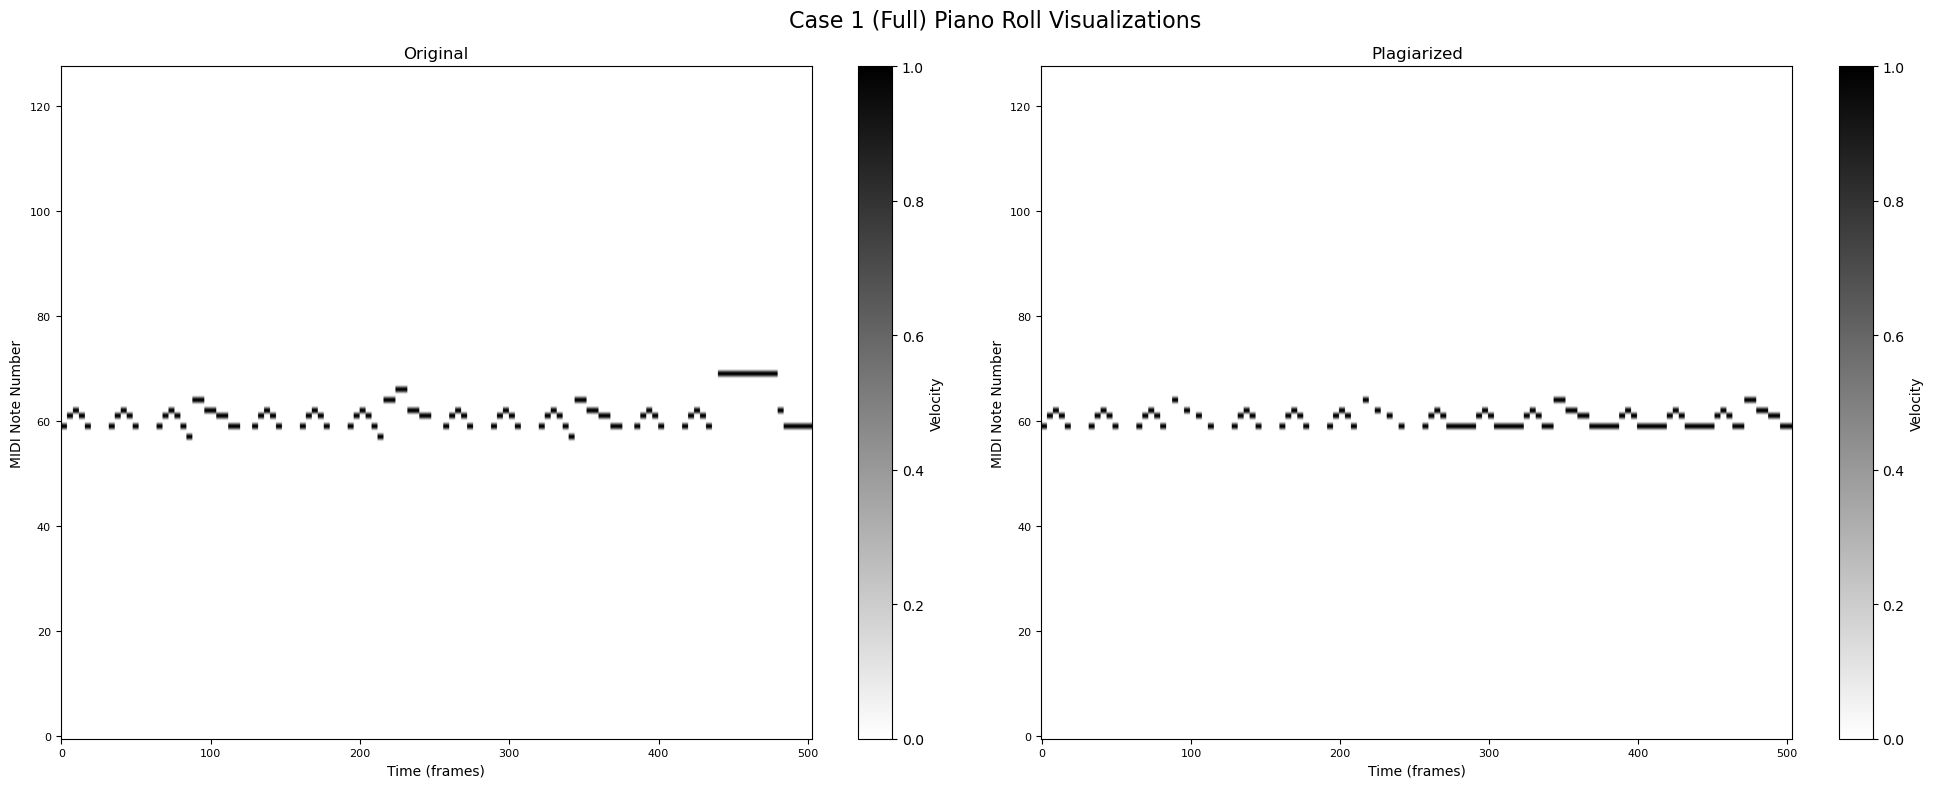

Processing case 2


c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:801: UserWarning: No time signatures found, assuming 4/4
  warnings.warn("No time signatures found, assuming 4/4")


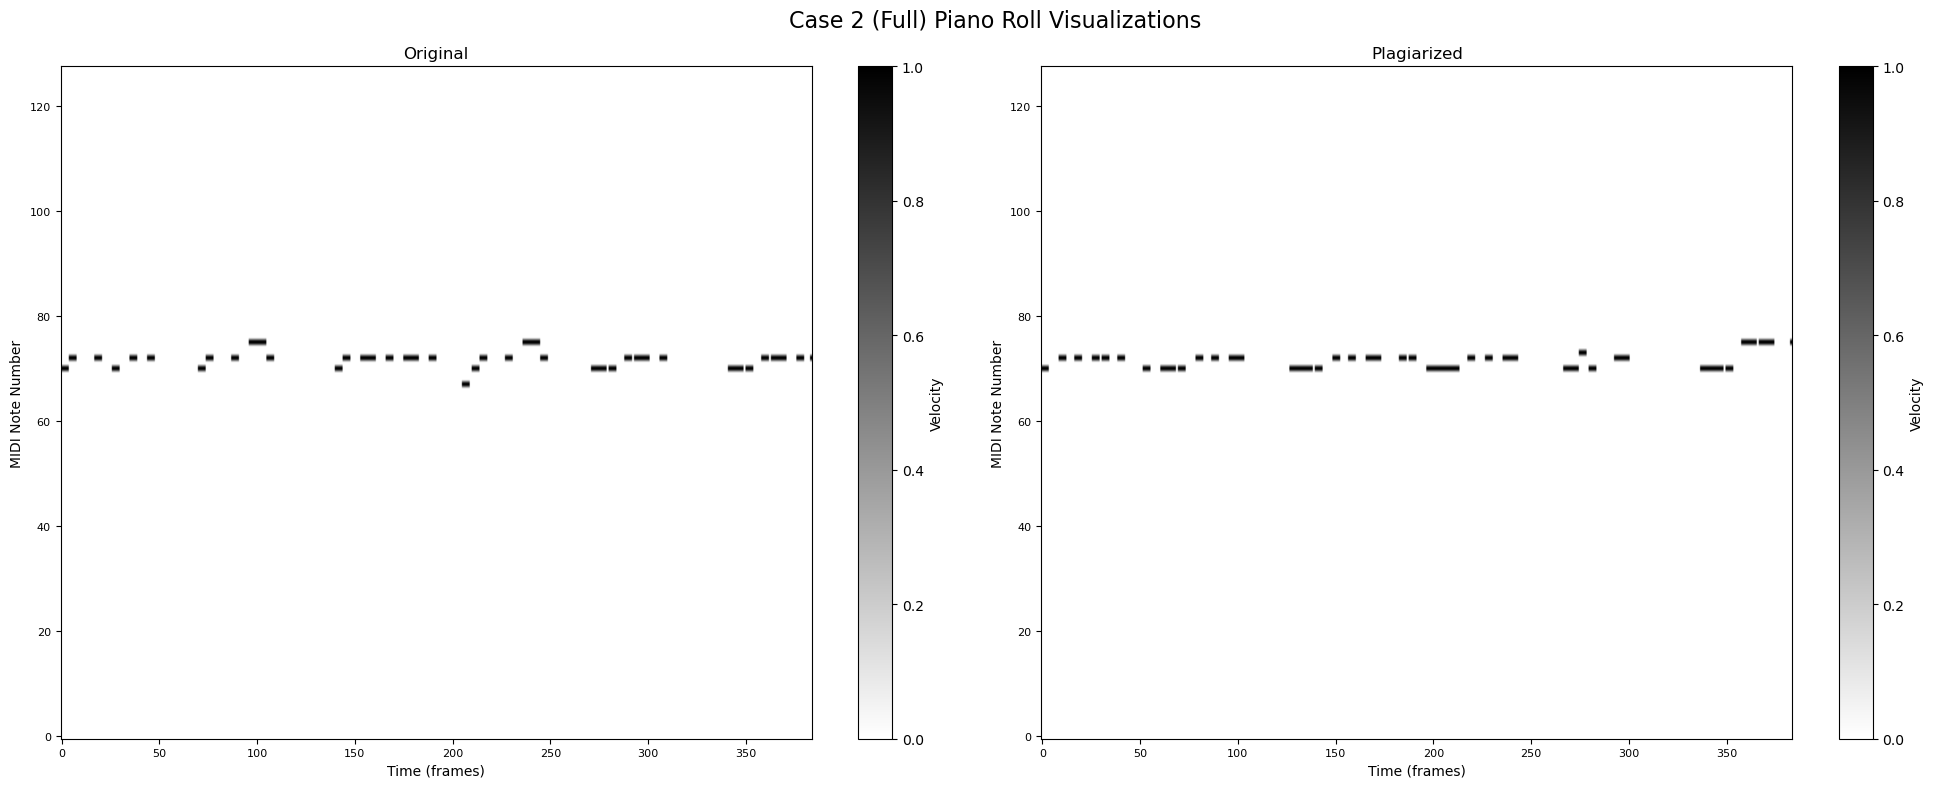

Processing case 3


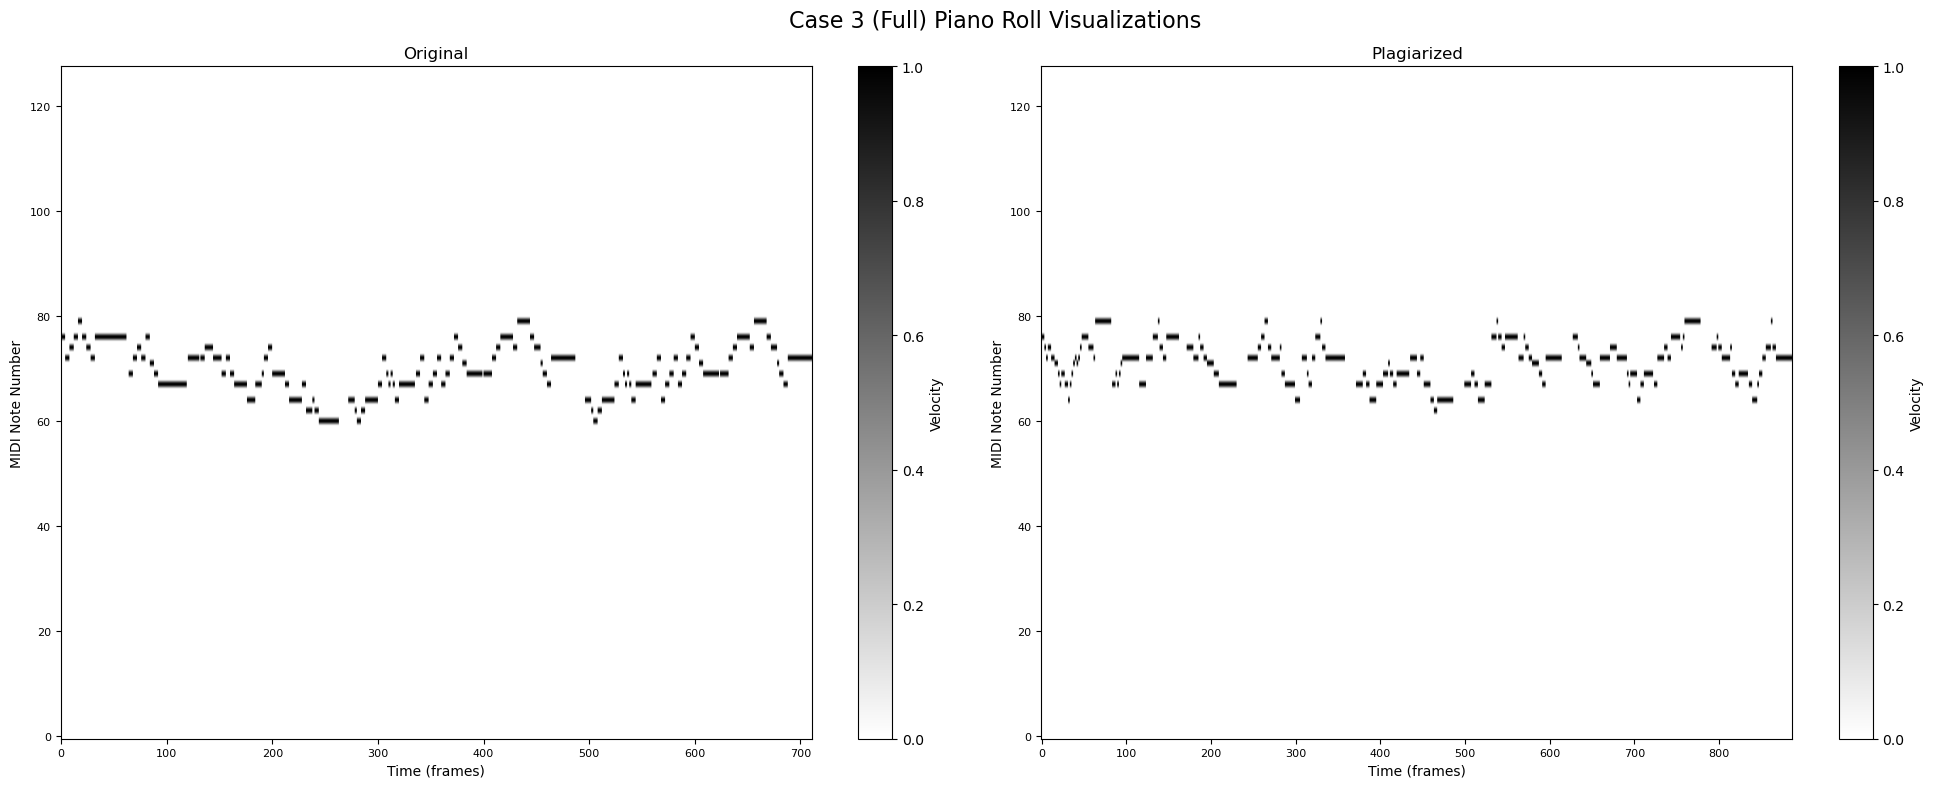

Processing case 4


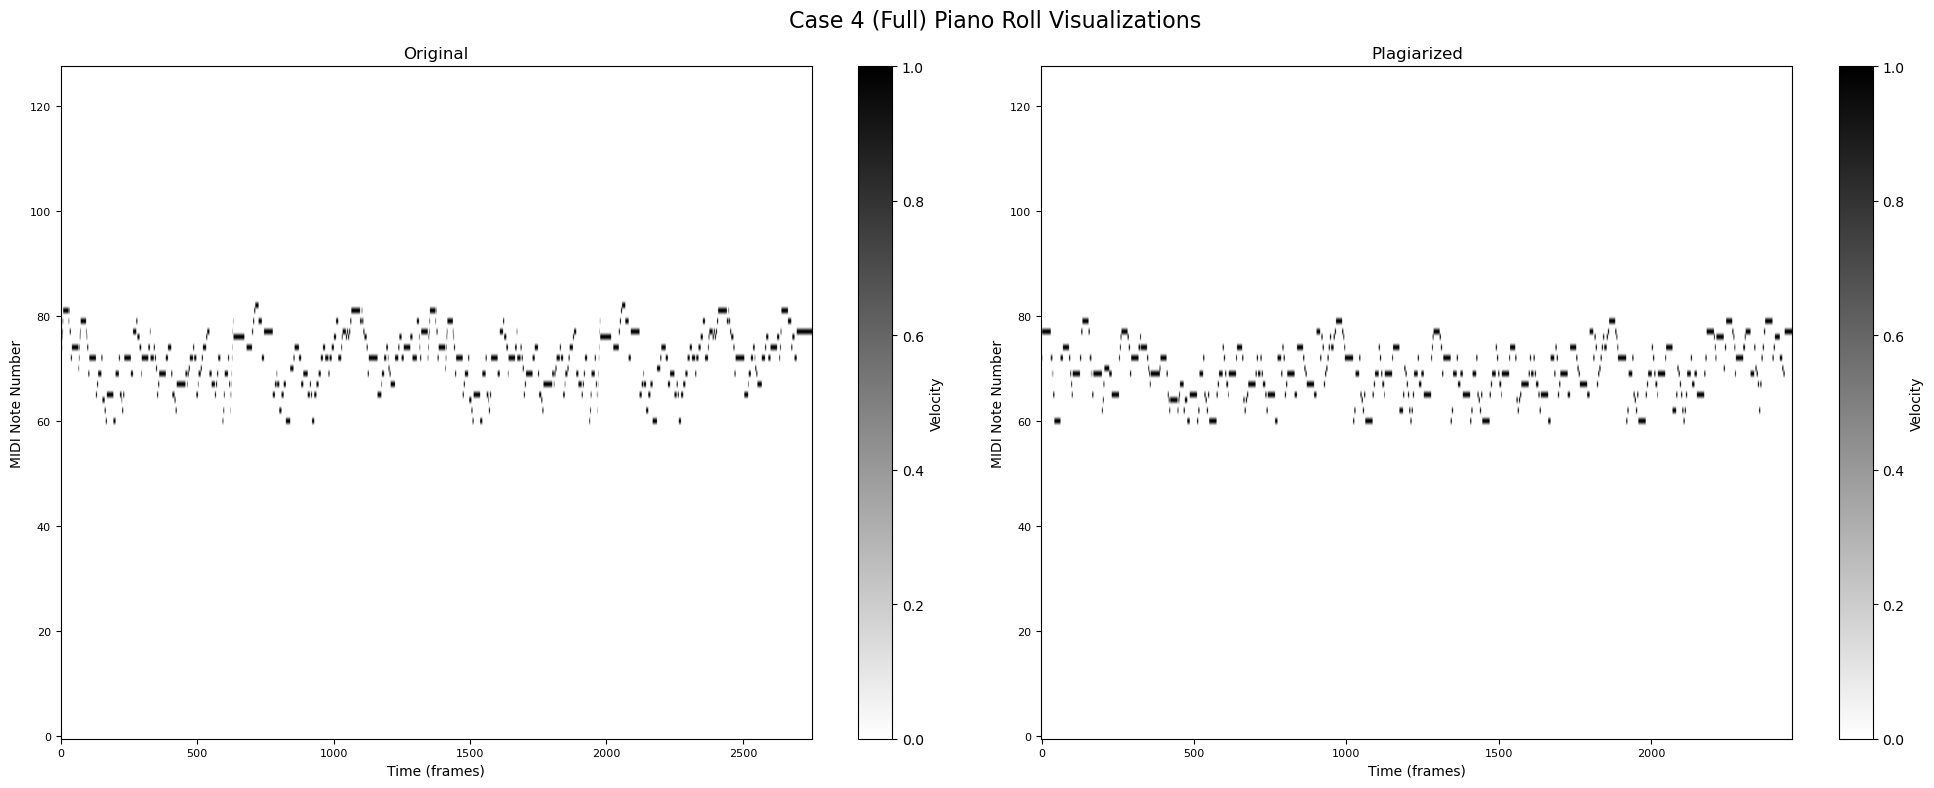

Processing case 5


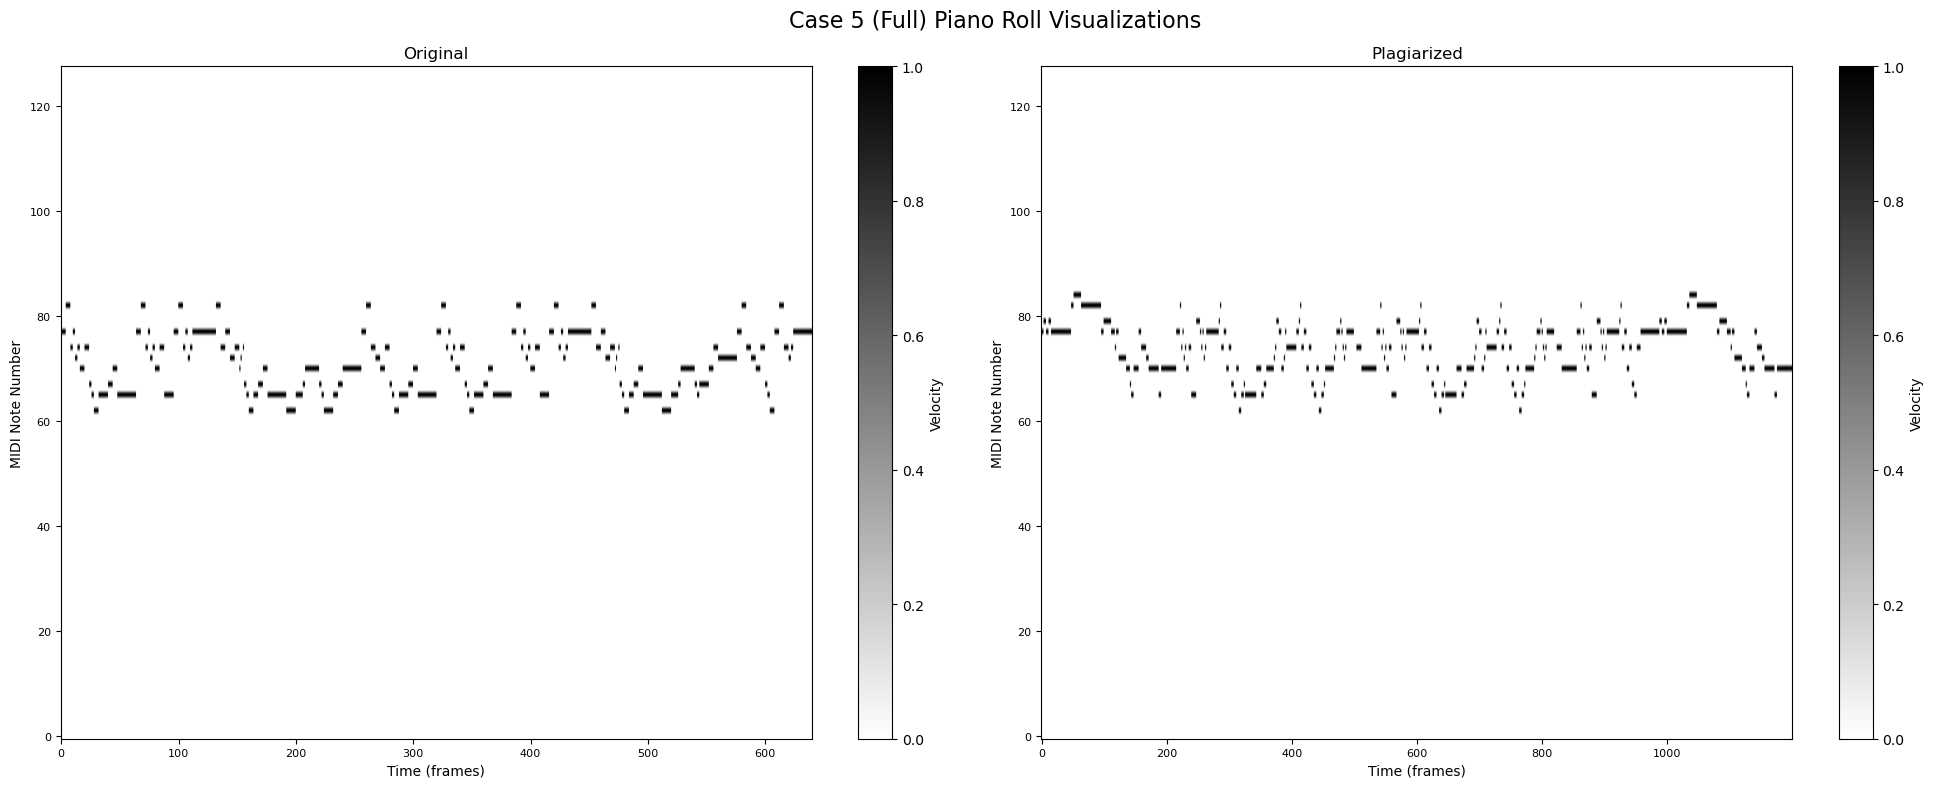

Processing case 6


c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:560: UserWarning: Sanitizing time signatures. They will be shared across all tracks.
  warnings.warn(


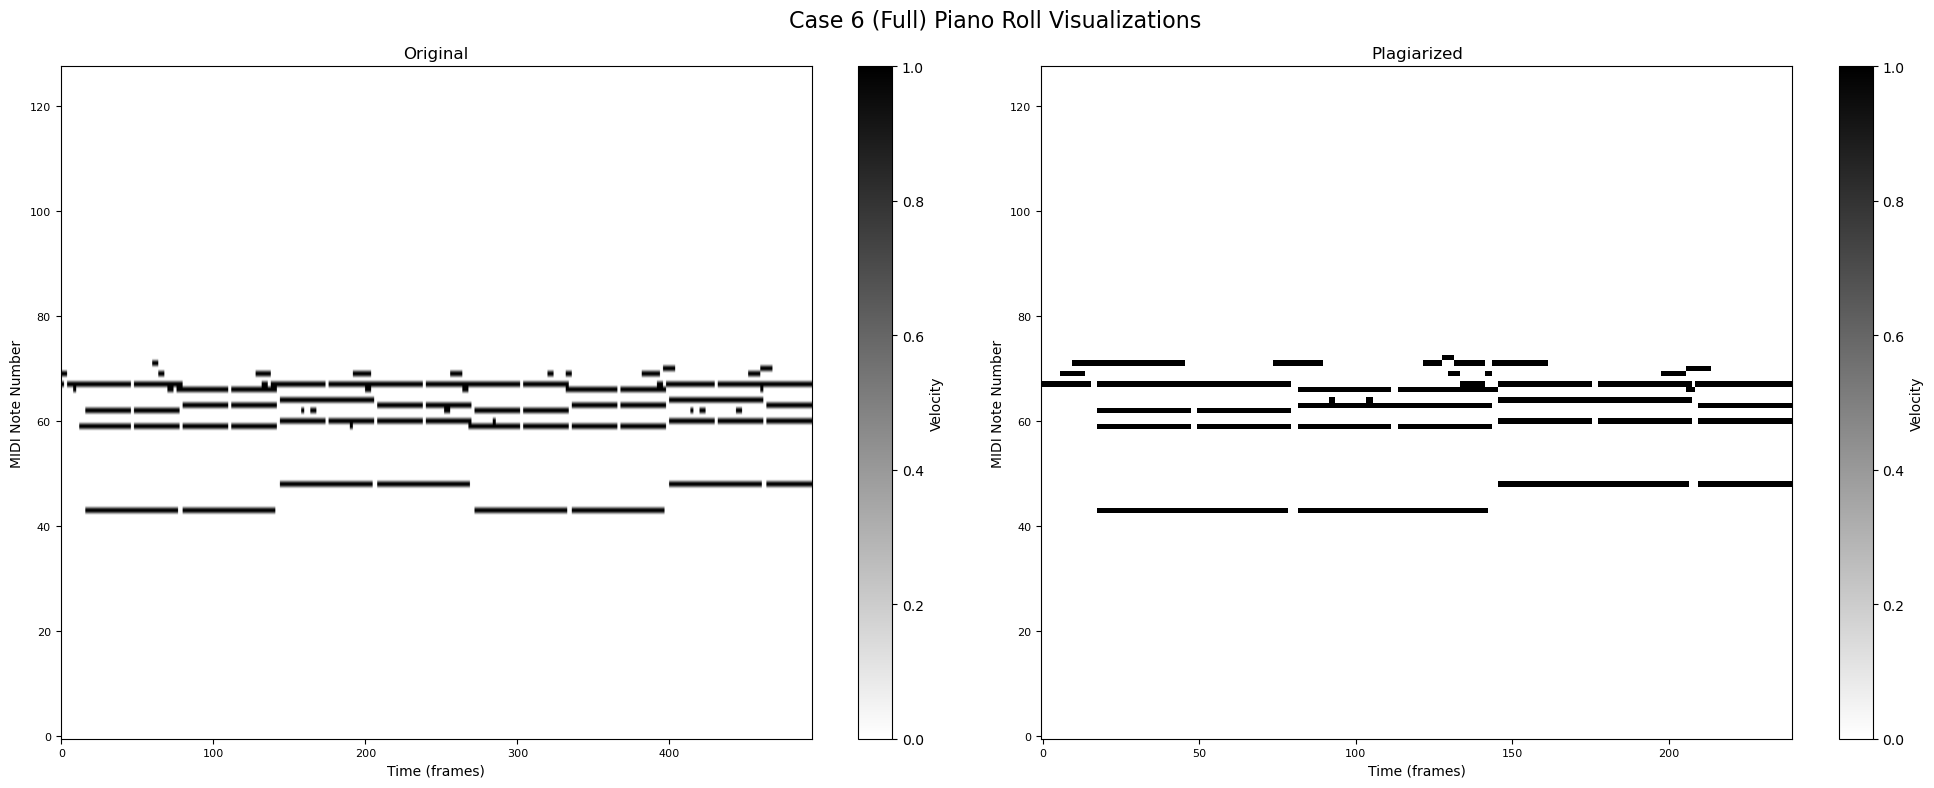

Processing case 7


c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:465: UserWarning: ignoring MIDI message note_on channel=6 note=62 velocity=0 time=79
  warnings.warn("ignoring MIDI message %s" % msg)
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:465: UserWarning: ignoring MIDI message note_on channel=6 note=62 velocity=0 time=236
  warnings.warn("ignoring MIDI message %s" % msg)
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:465: UserWarning: ignoring MIDI message note_on channel=6 note=62 velocity=0 time=60
  warnings.warn("ignoring MIDI message %s" % msg)
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:465: UserWarning: ignoring MIDI message note_on channel=6 note=62 velocity=0 time=0
  warnings.warn("ignoring MIDI message %s" % msg)
c:\Users\cunn2\miniconda3\envs\sms\Lib\site-packages\partitura\io\importmidi.py:465: UserWarning: ignoring MIDI message note_on channel=6 no

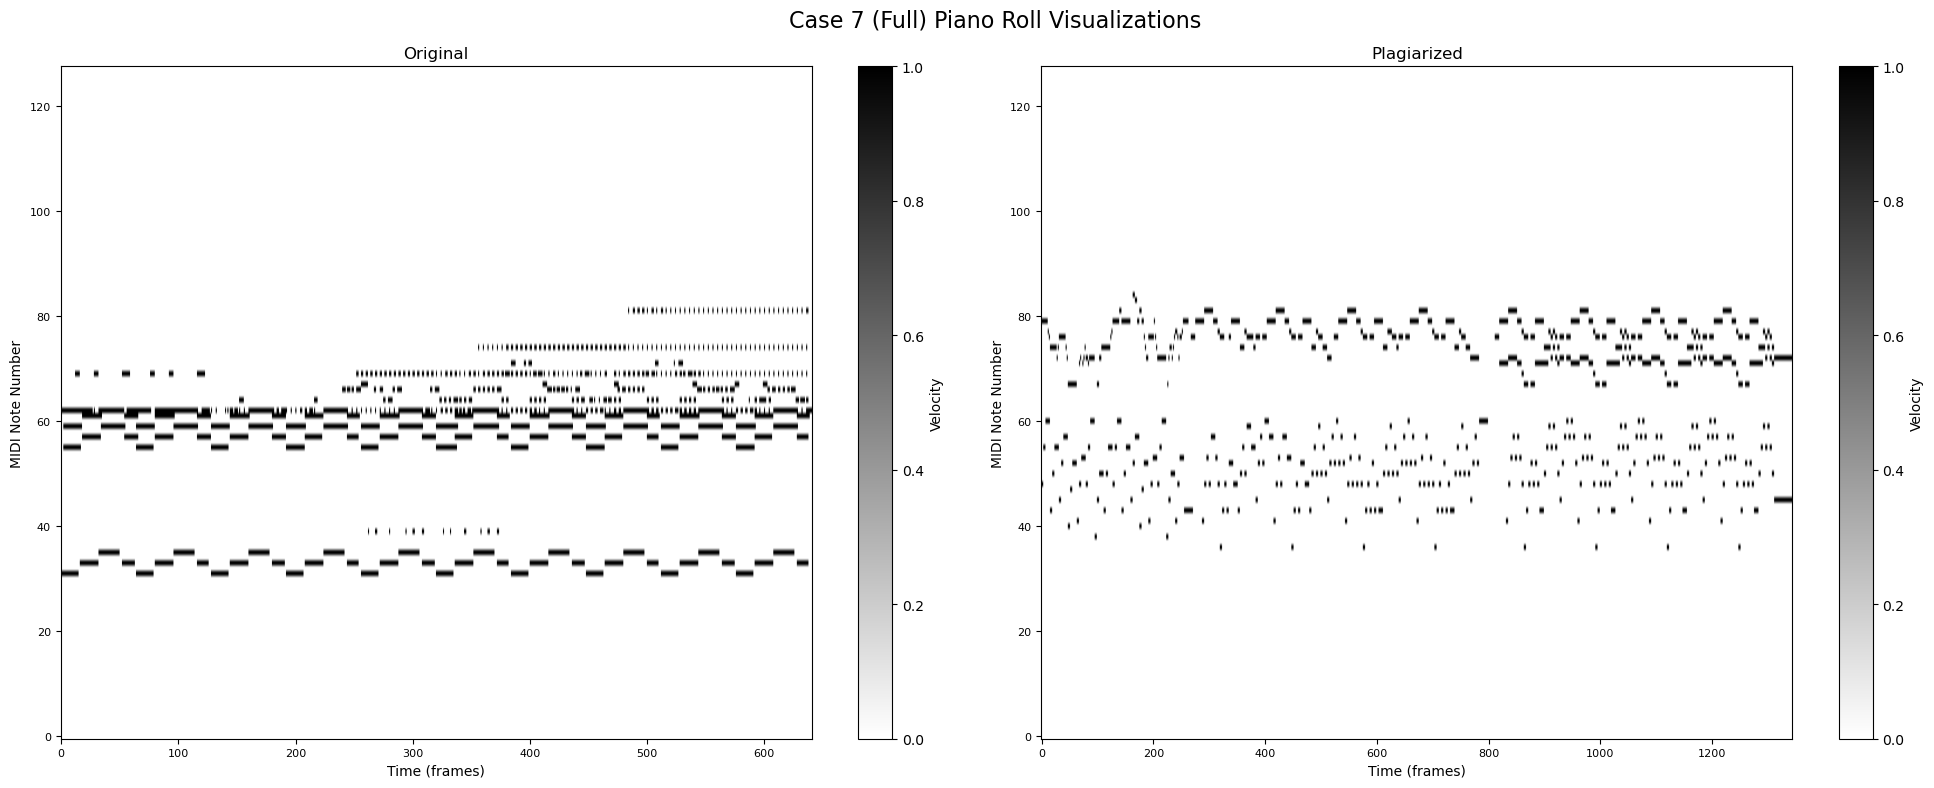

Processing case 8


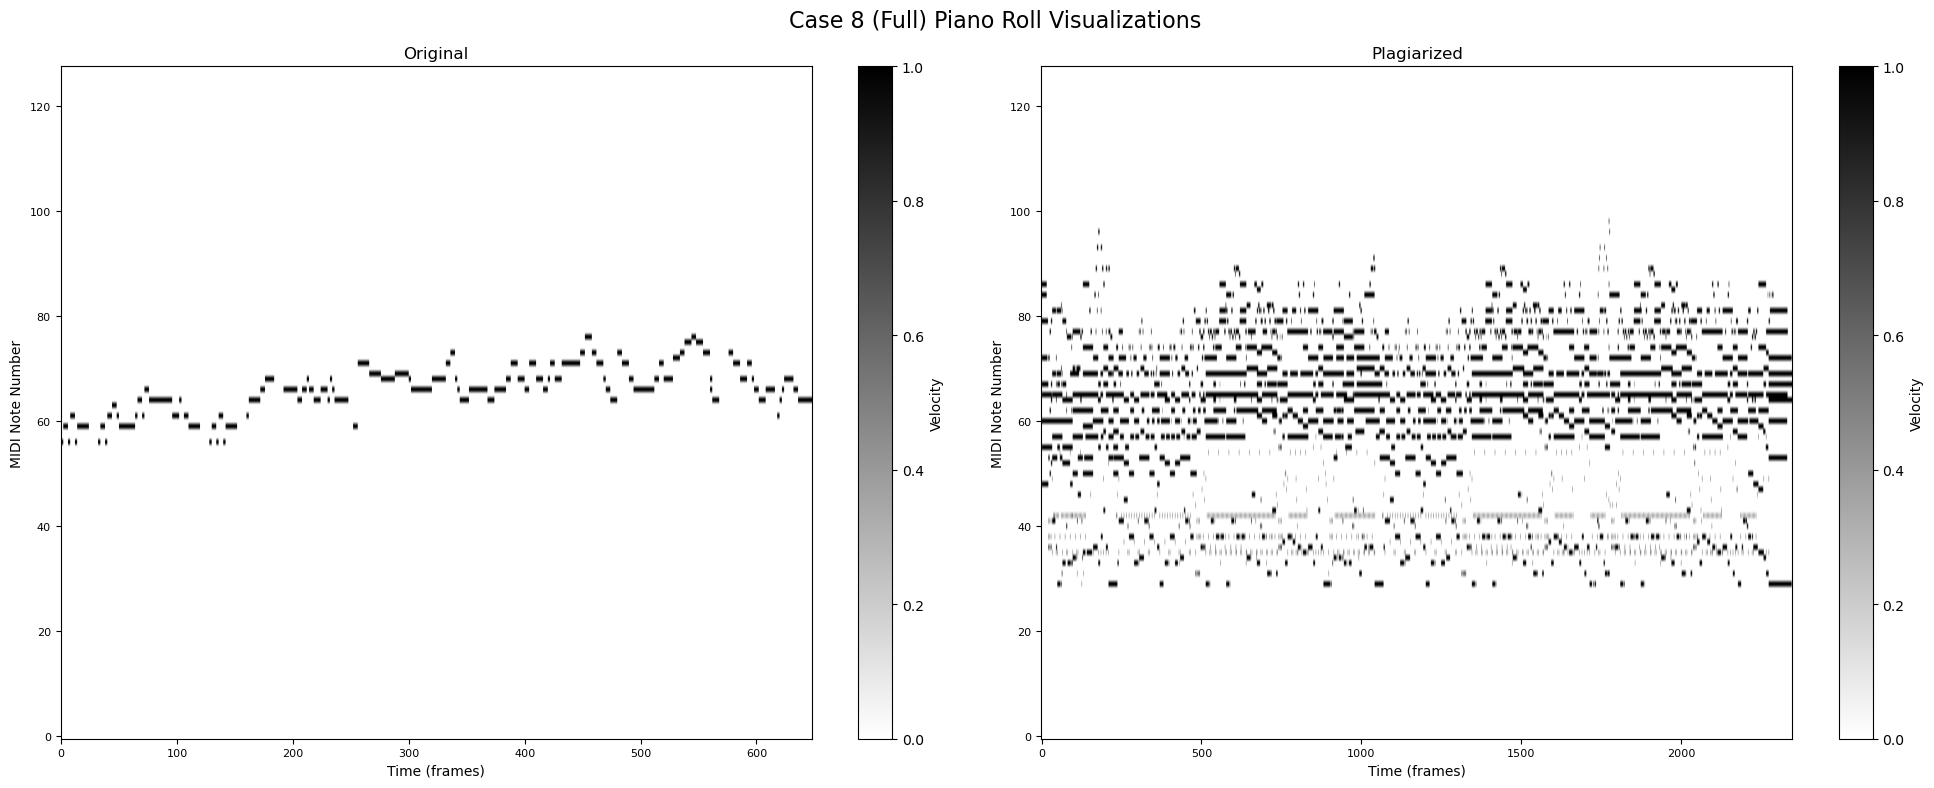

Processing case 9


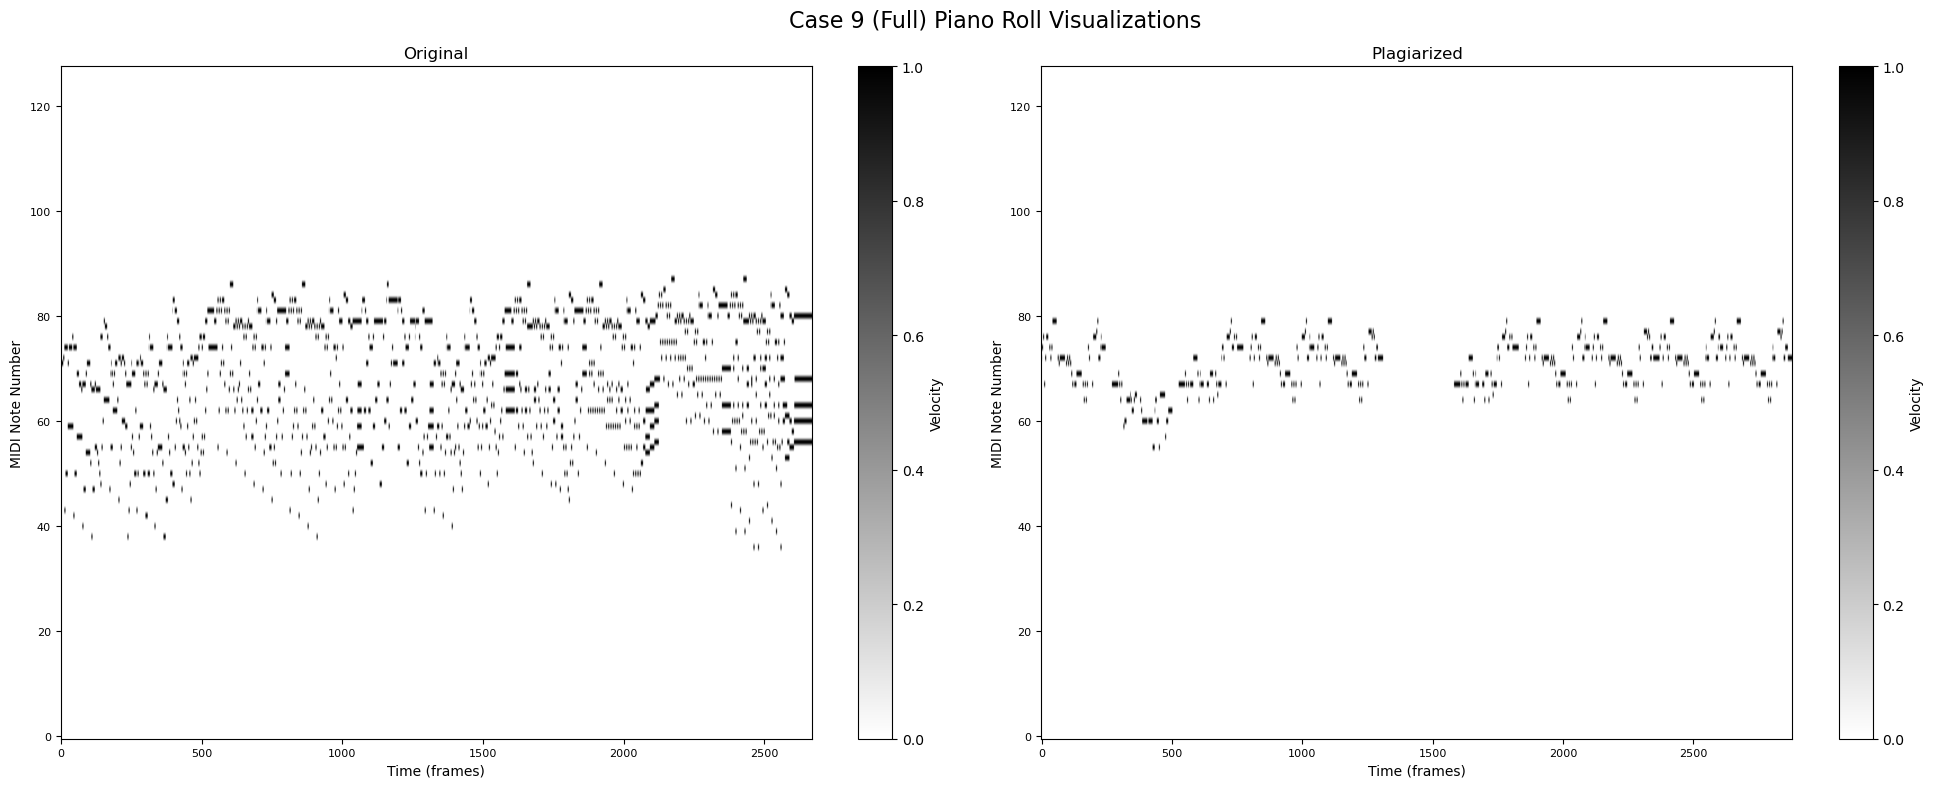

Processing case 10


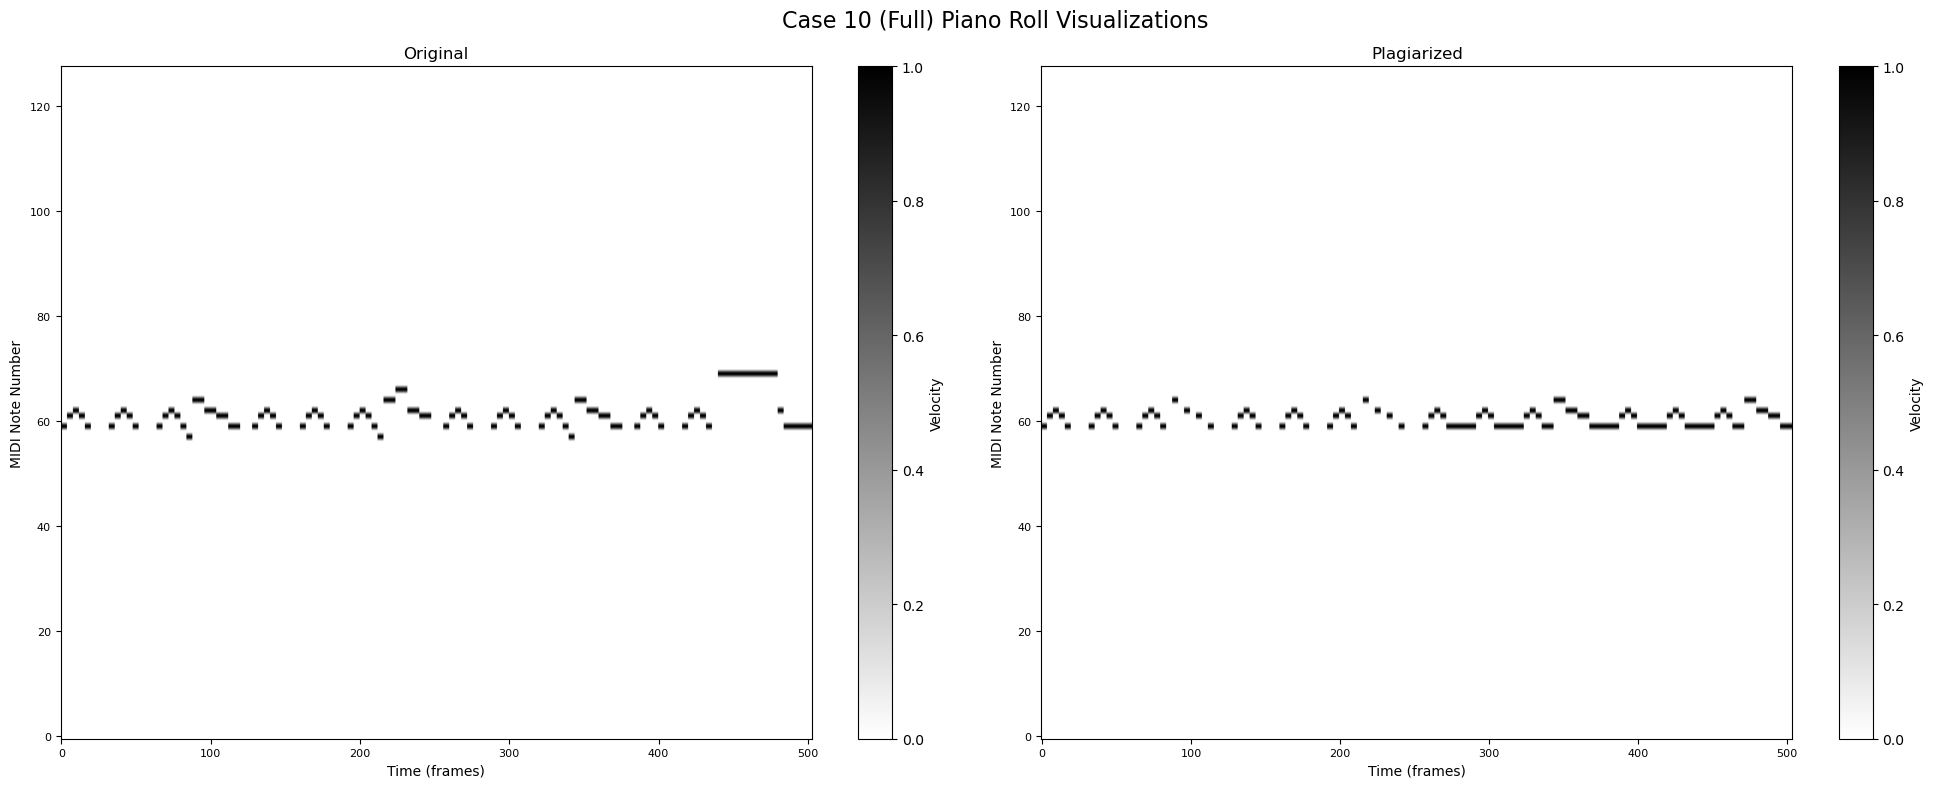

Processing case 11


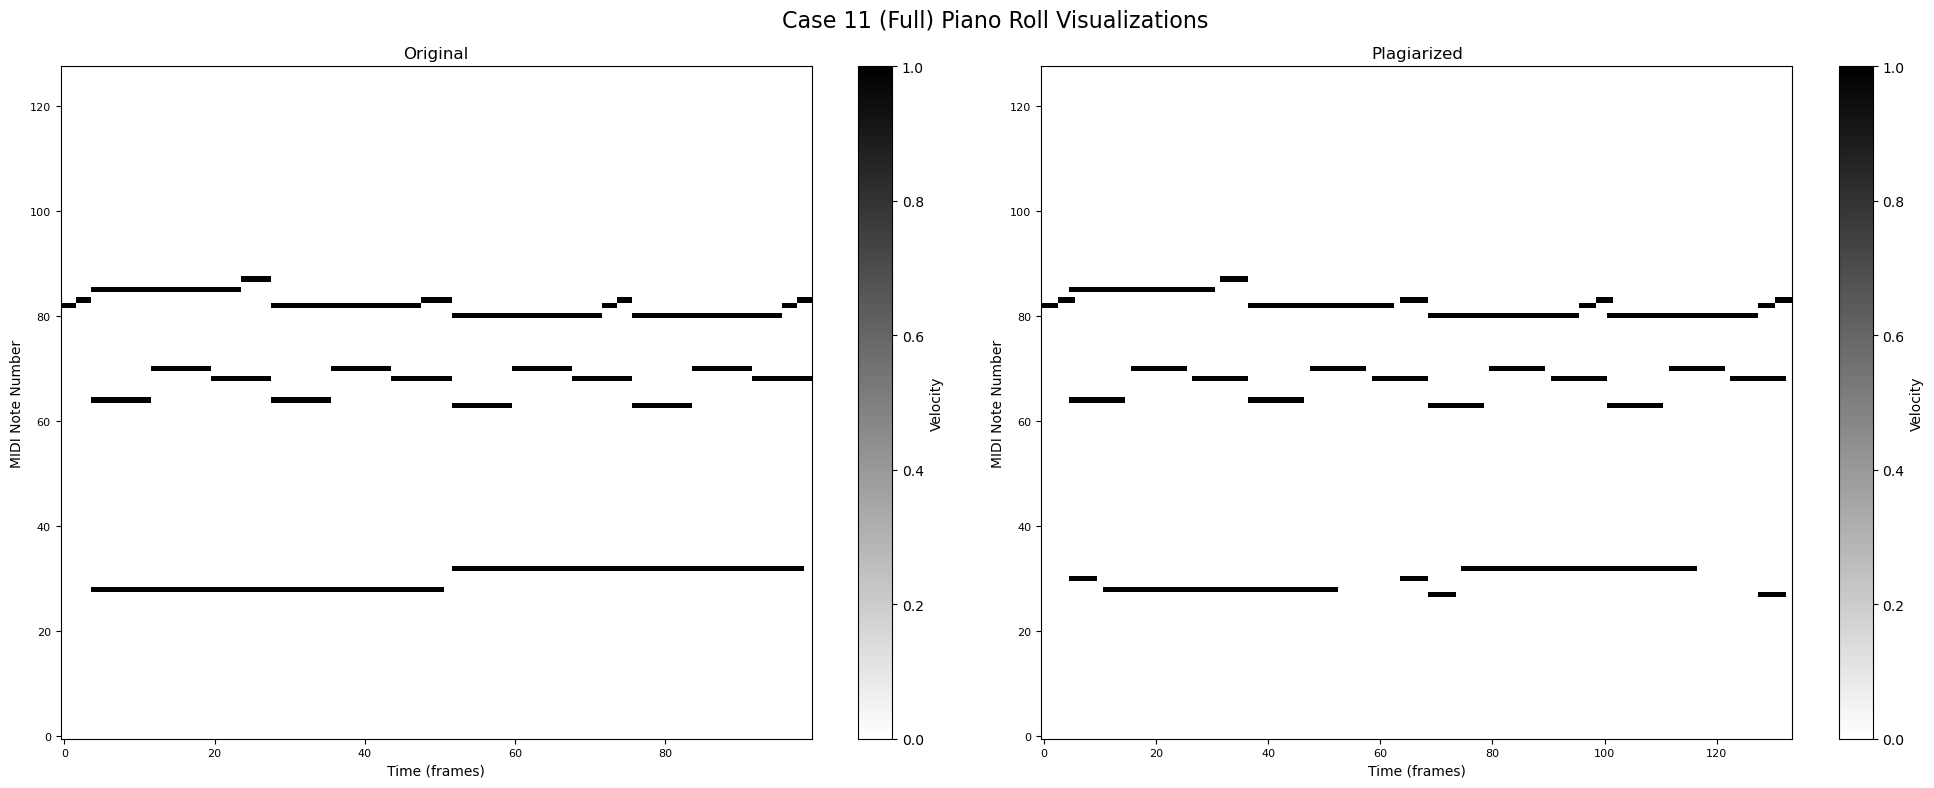

Processing case 12


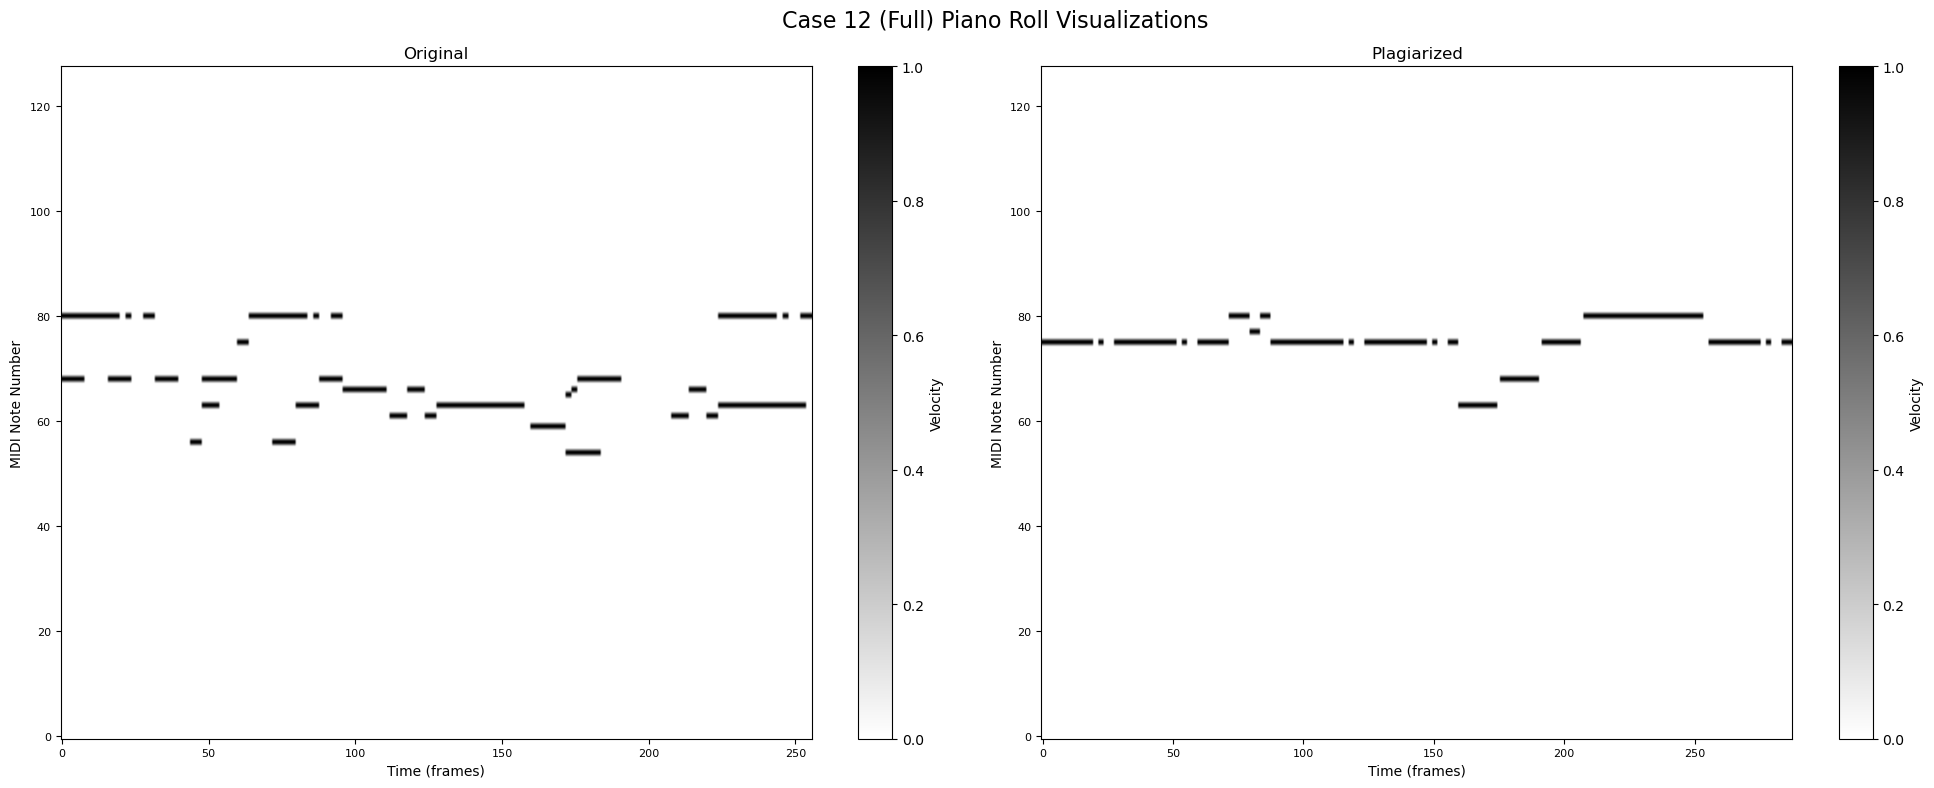

Processing case 13


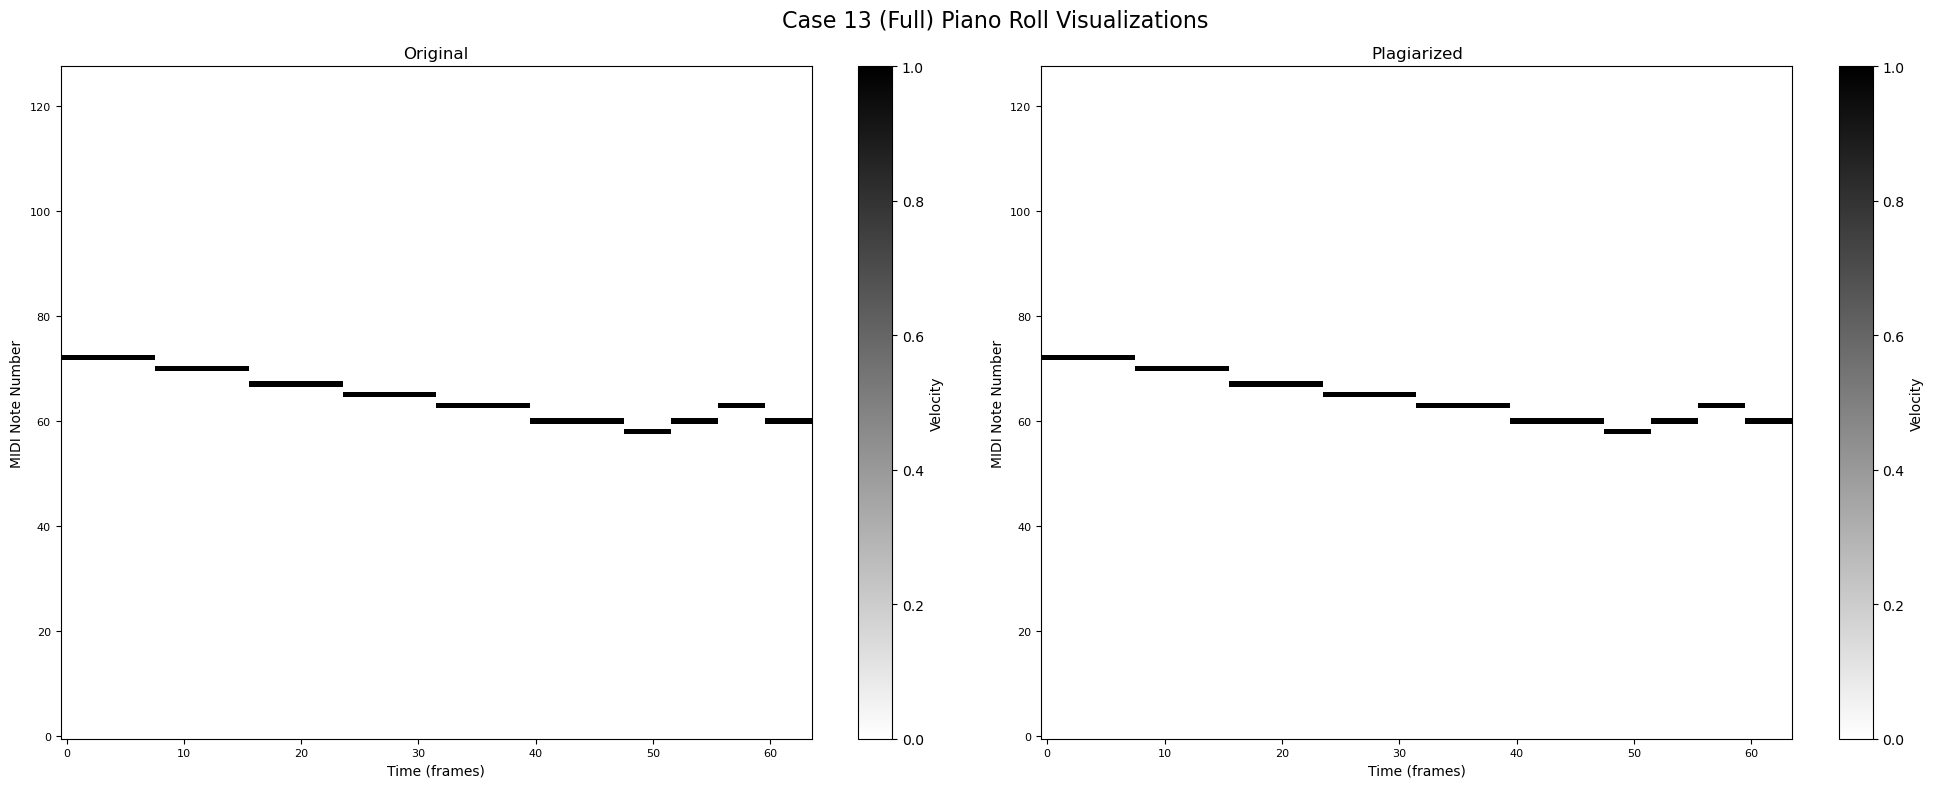

Processing case 14


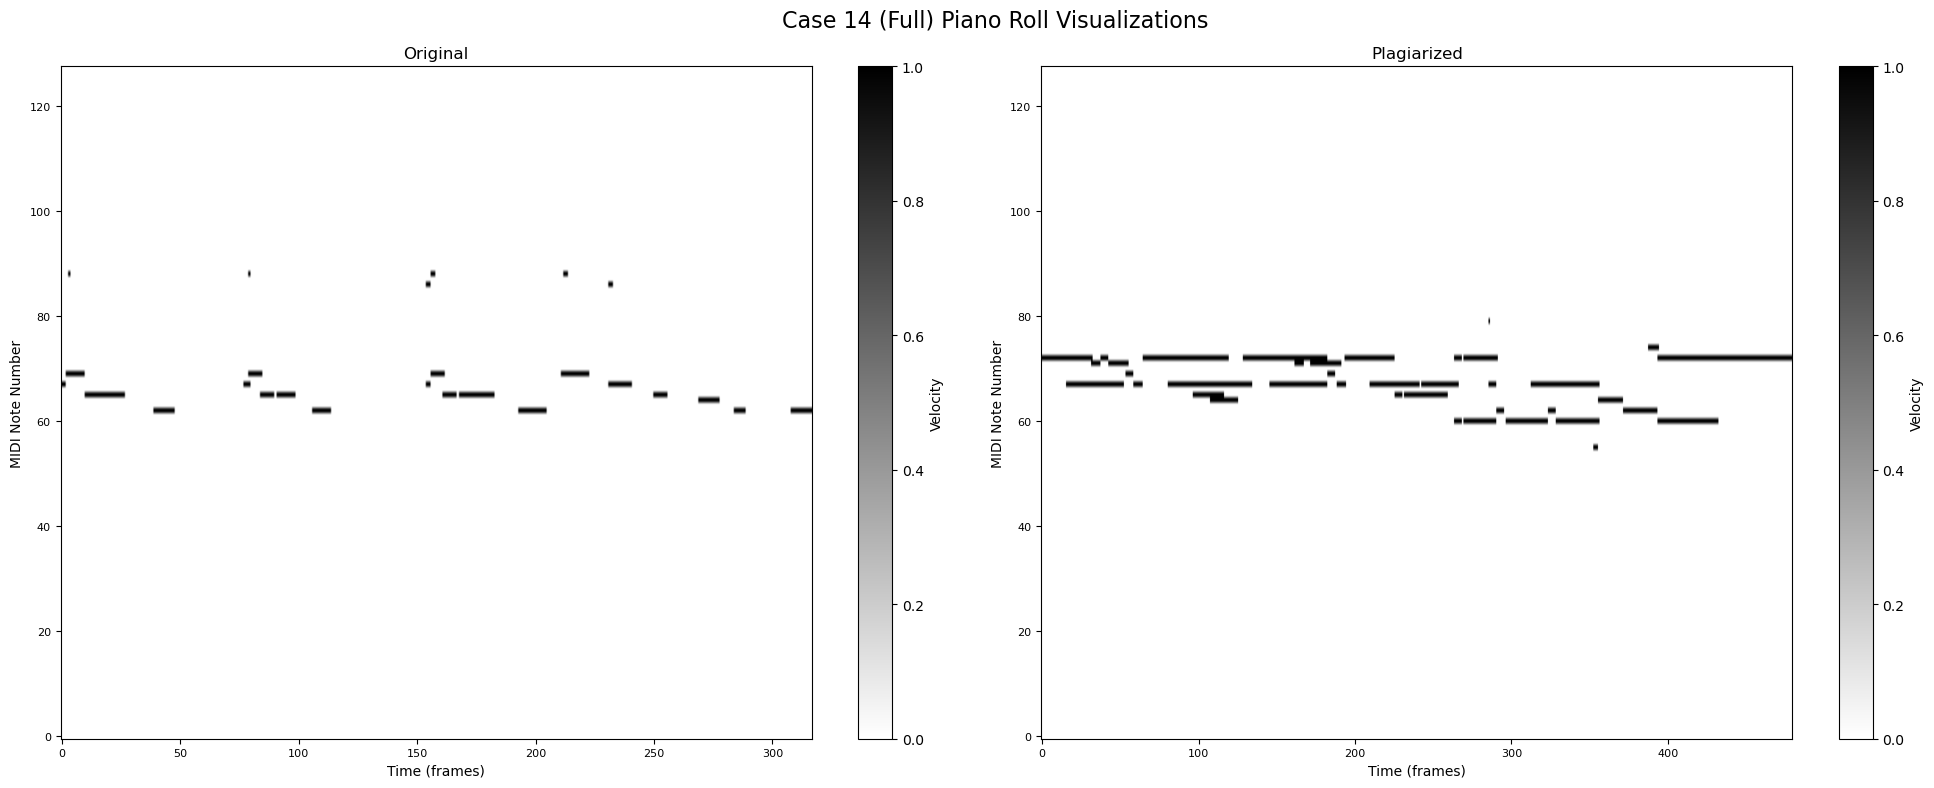

Processing case 15


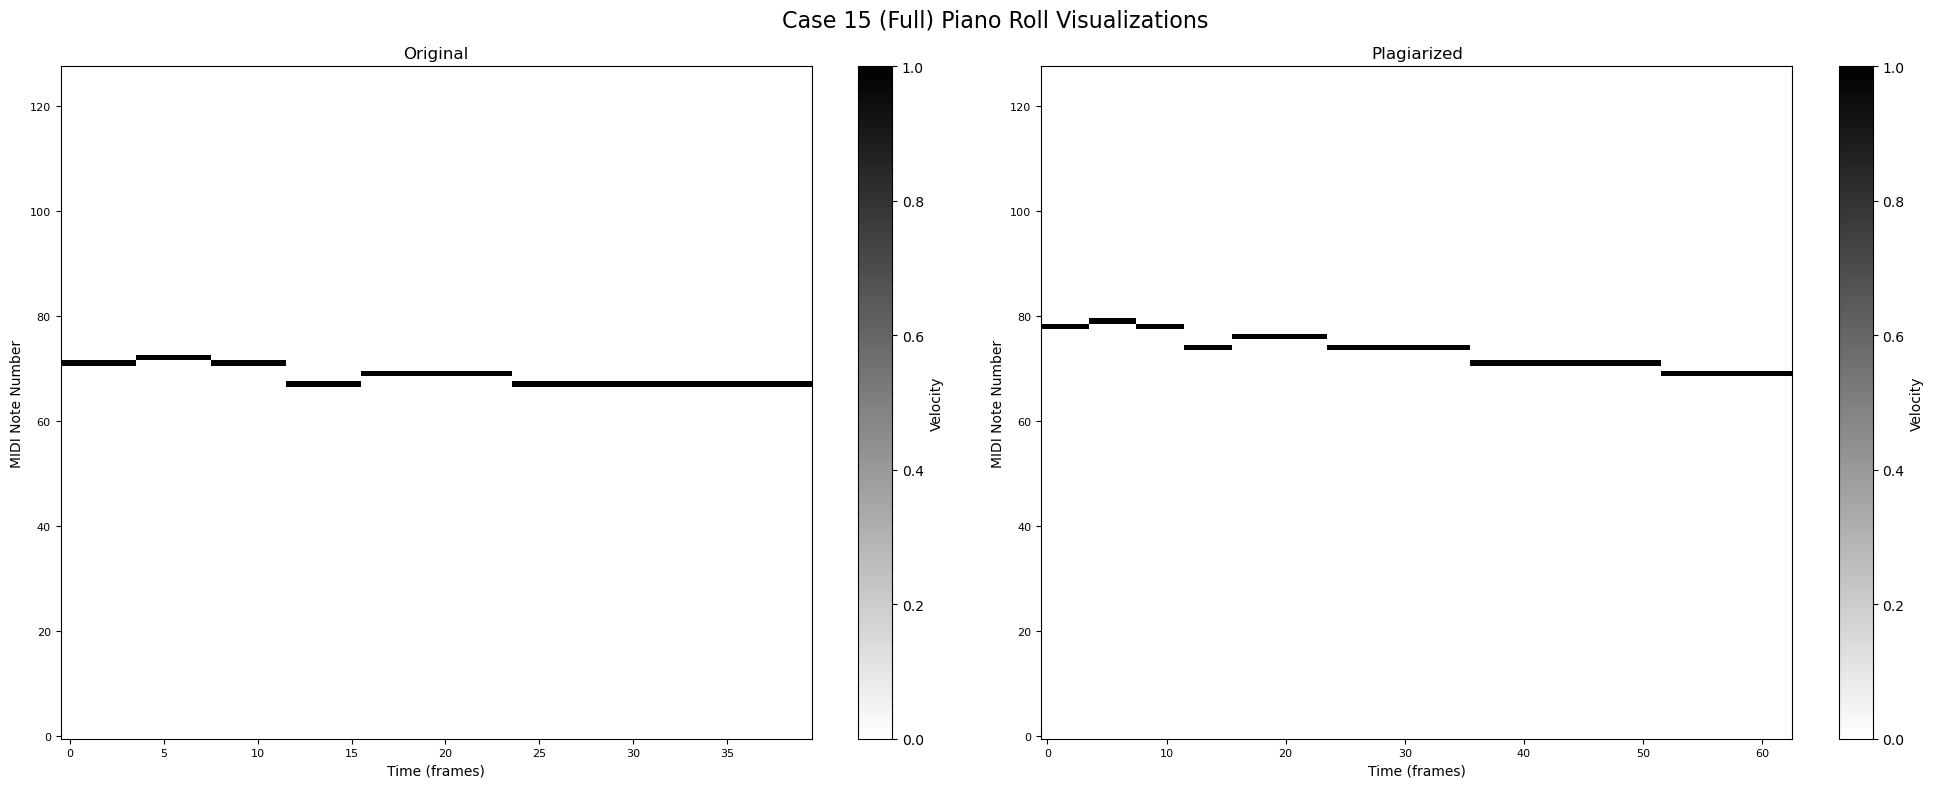

Processing case 16


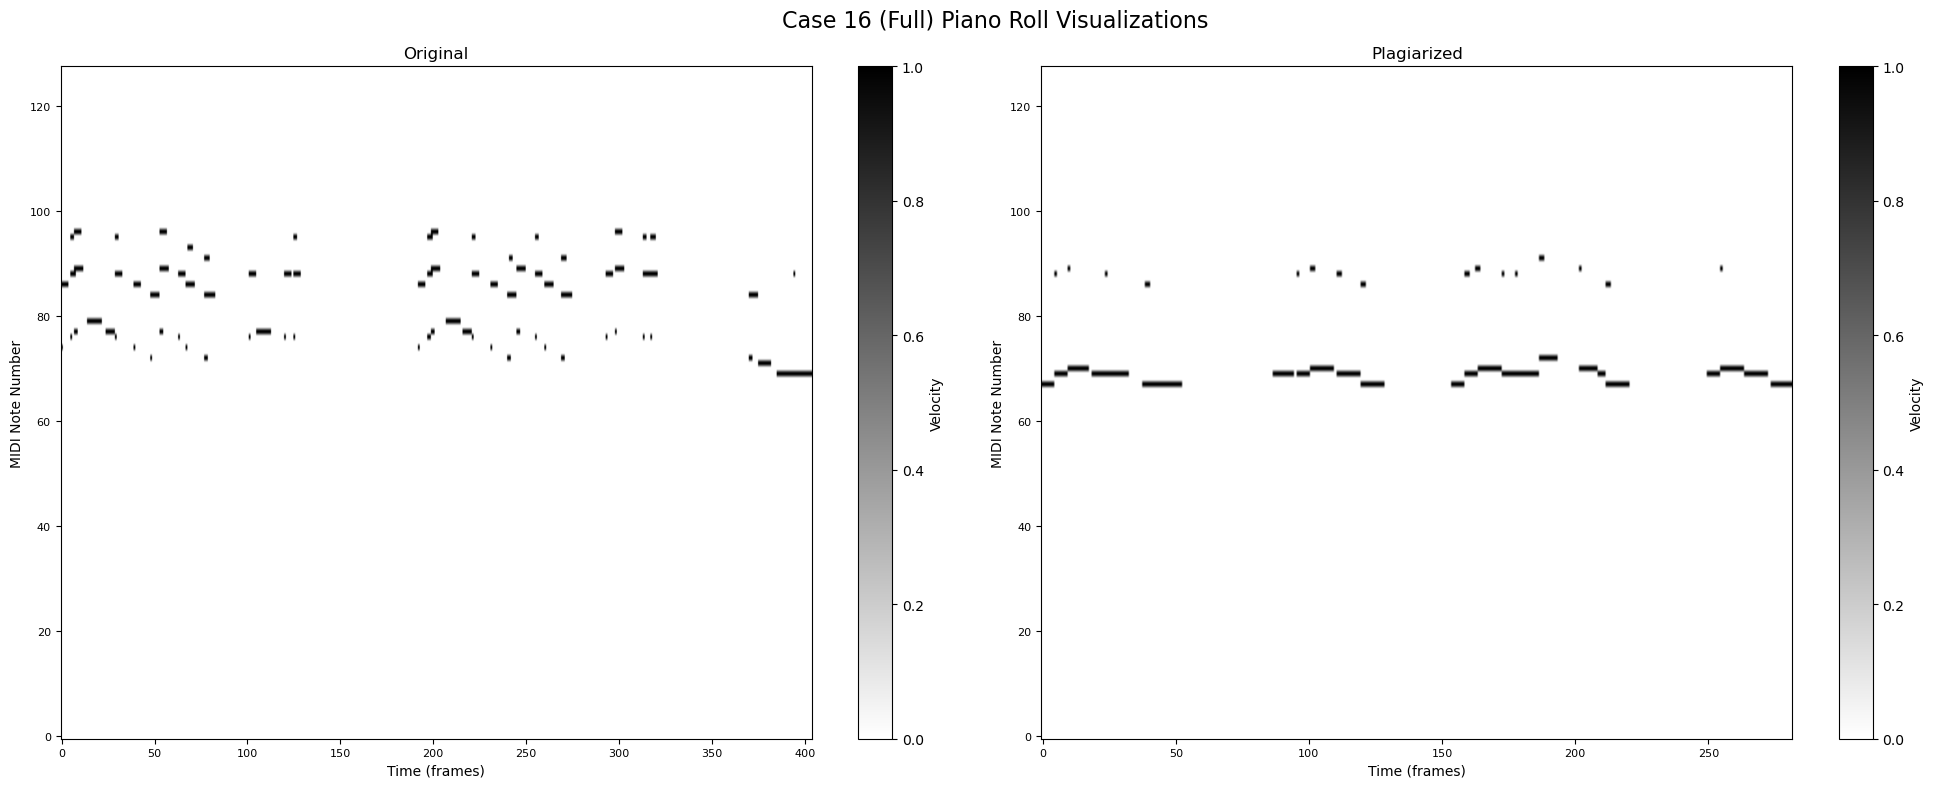

Processing case 17


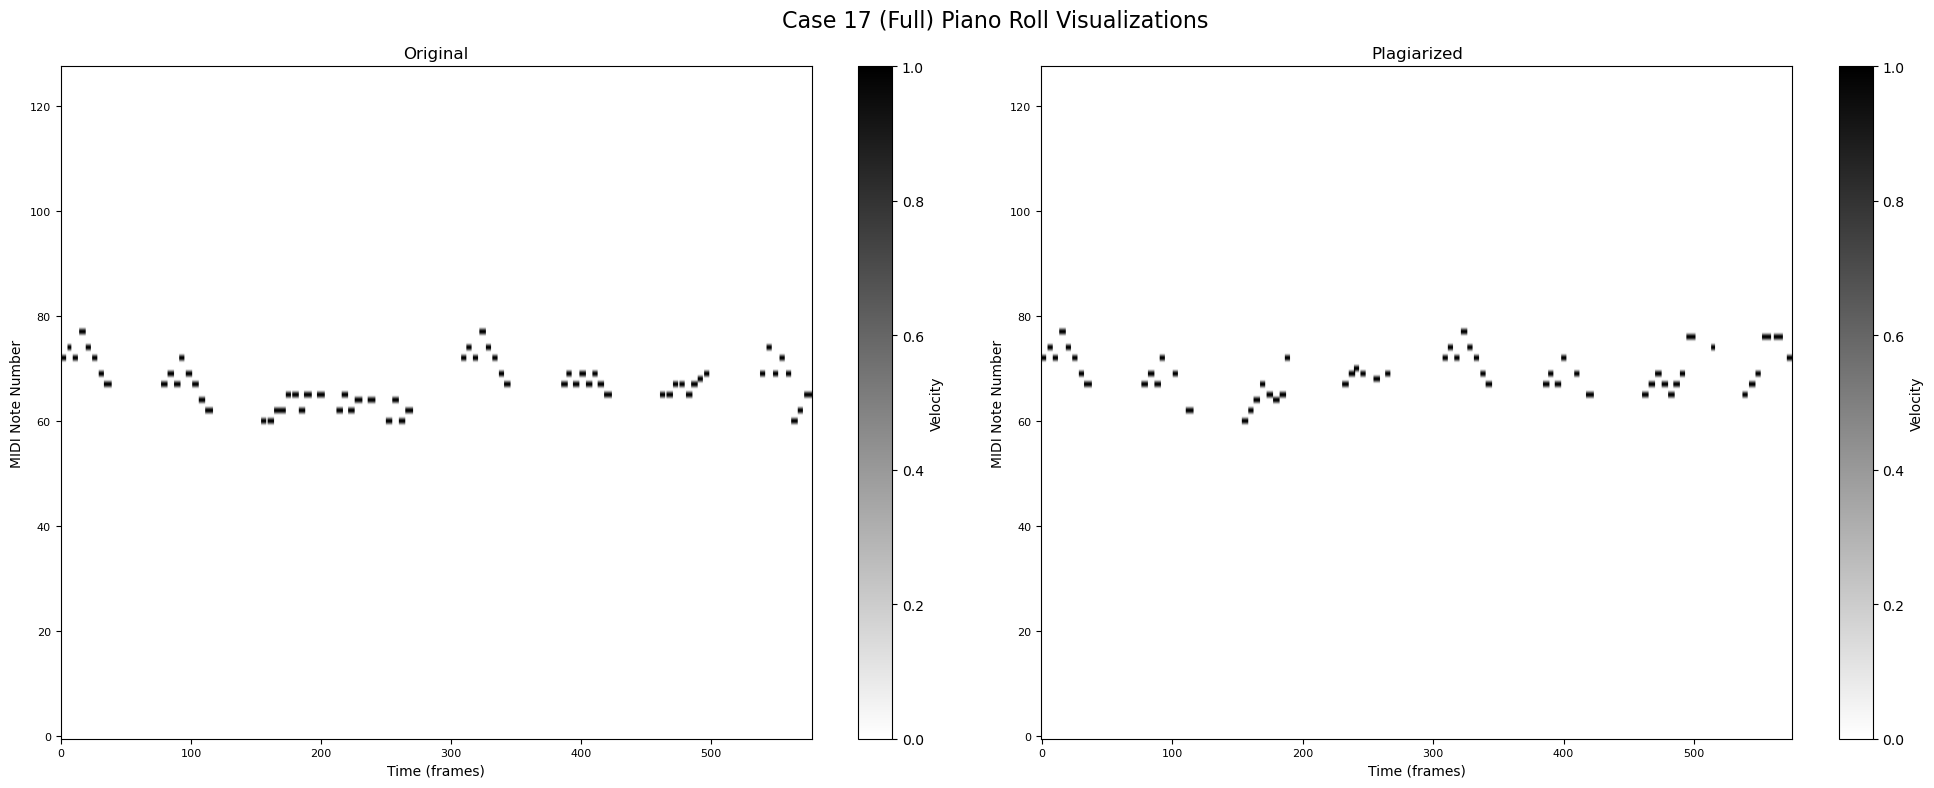

Processing case 18


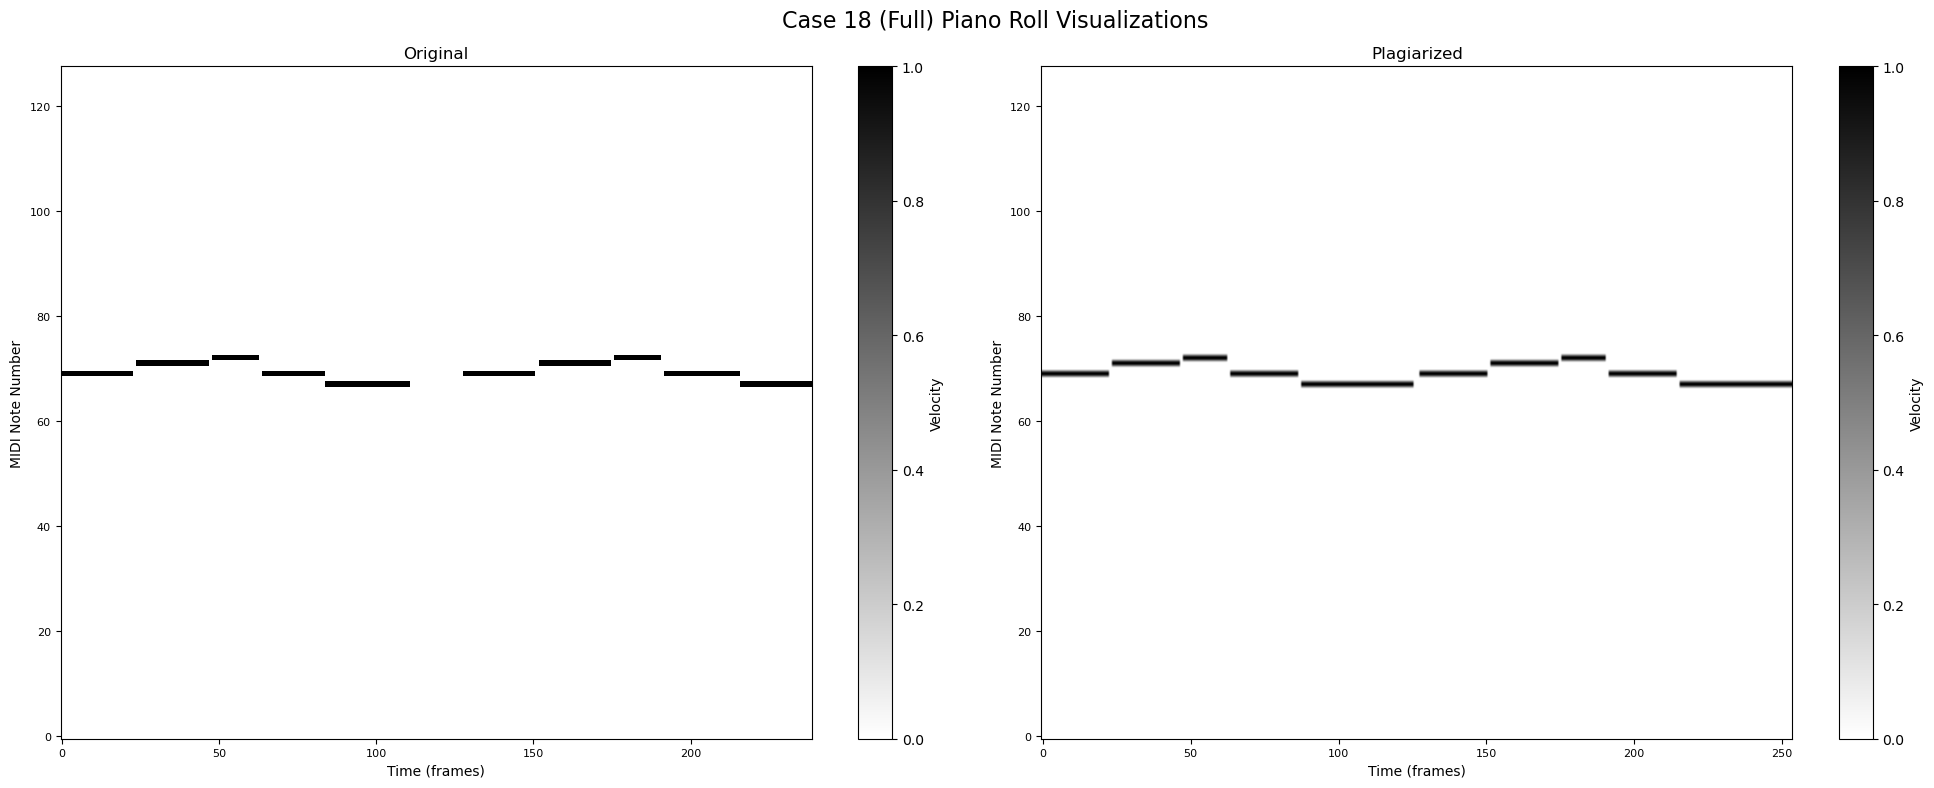

Processing case 19


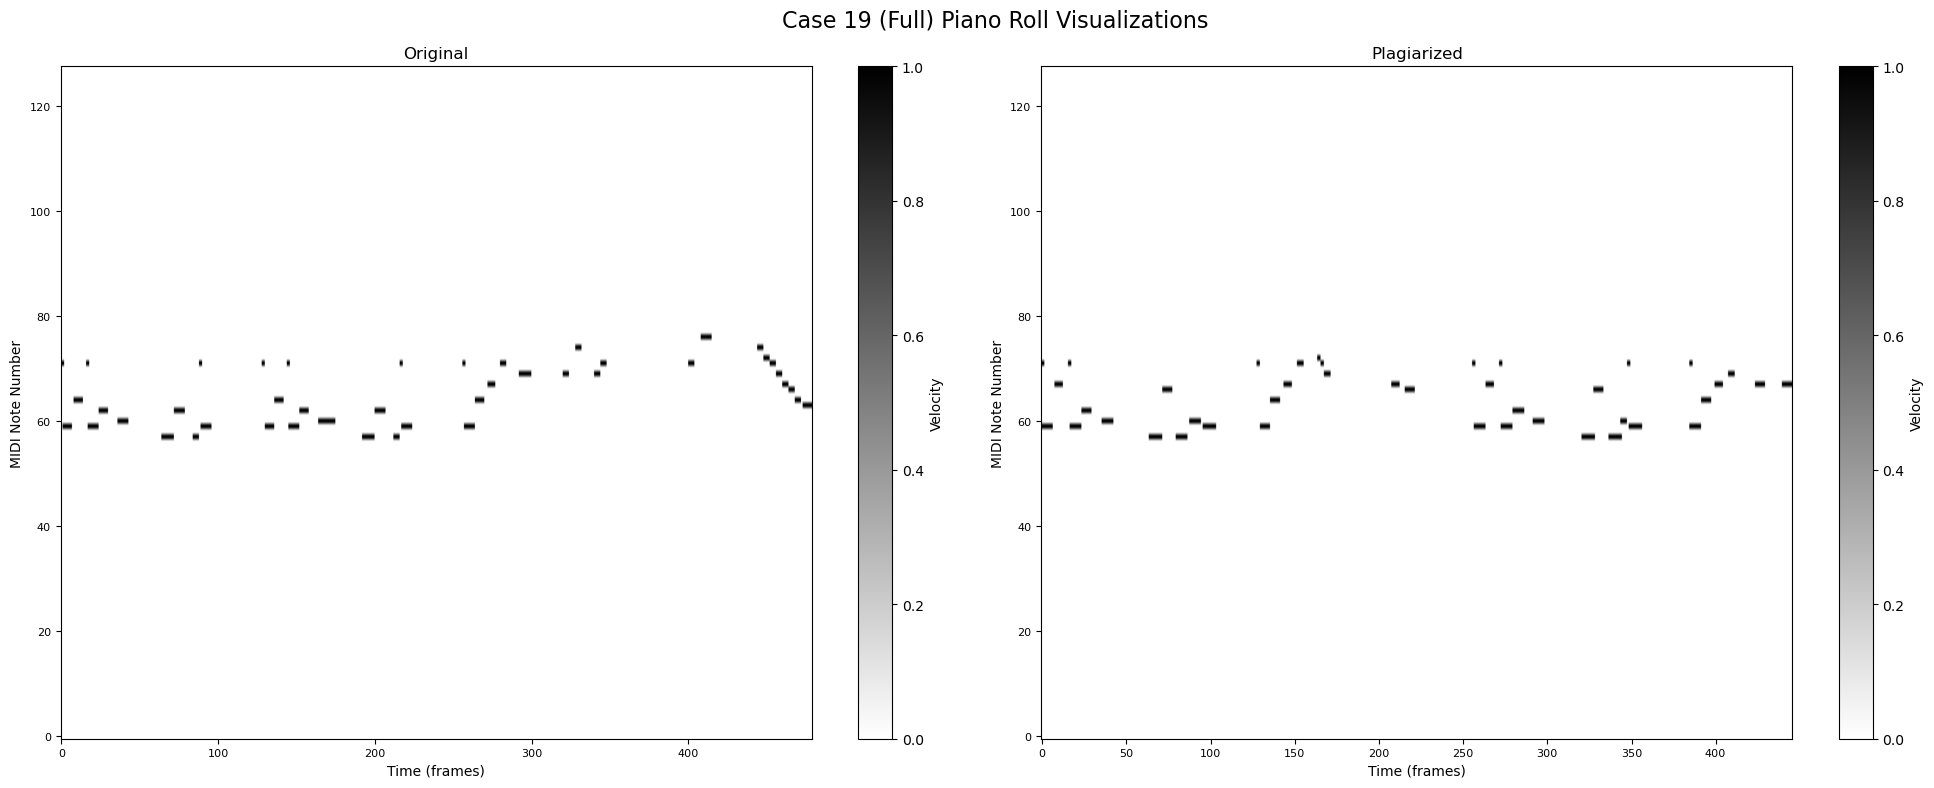

Processing case 20


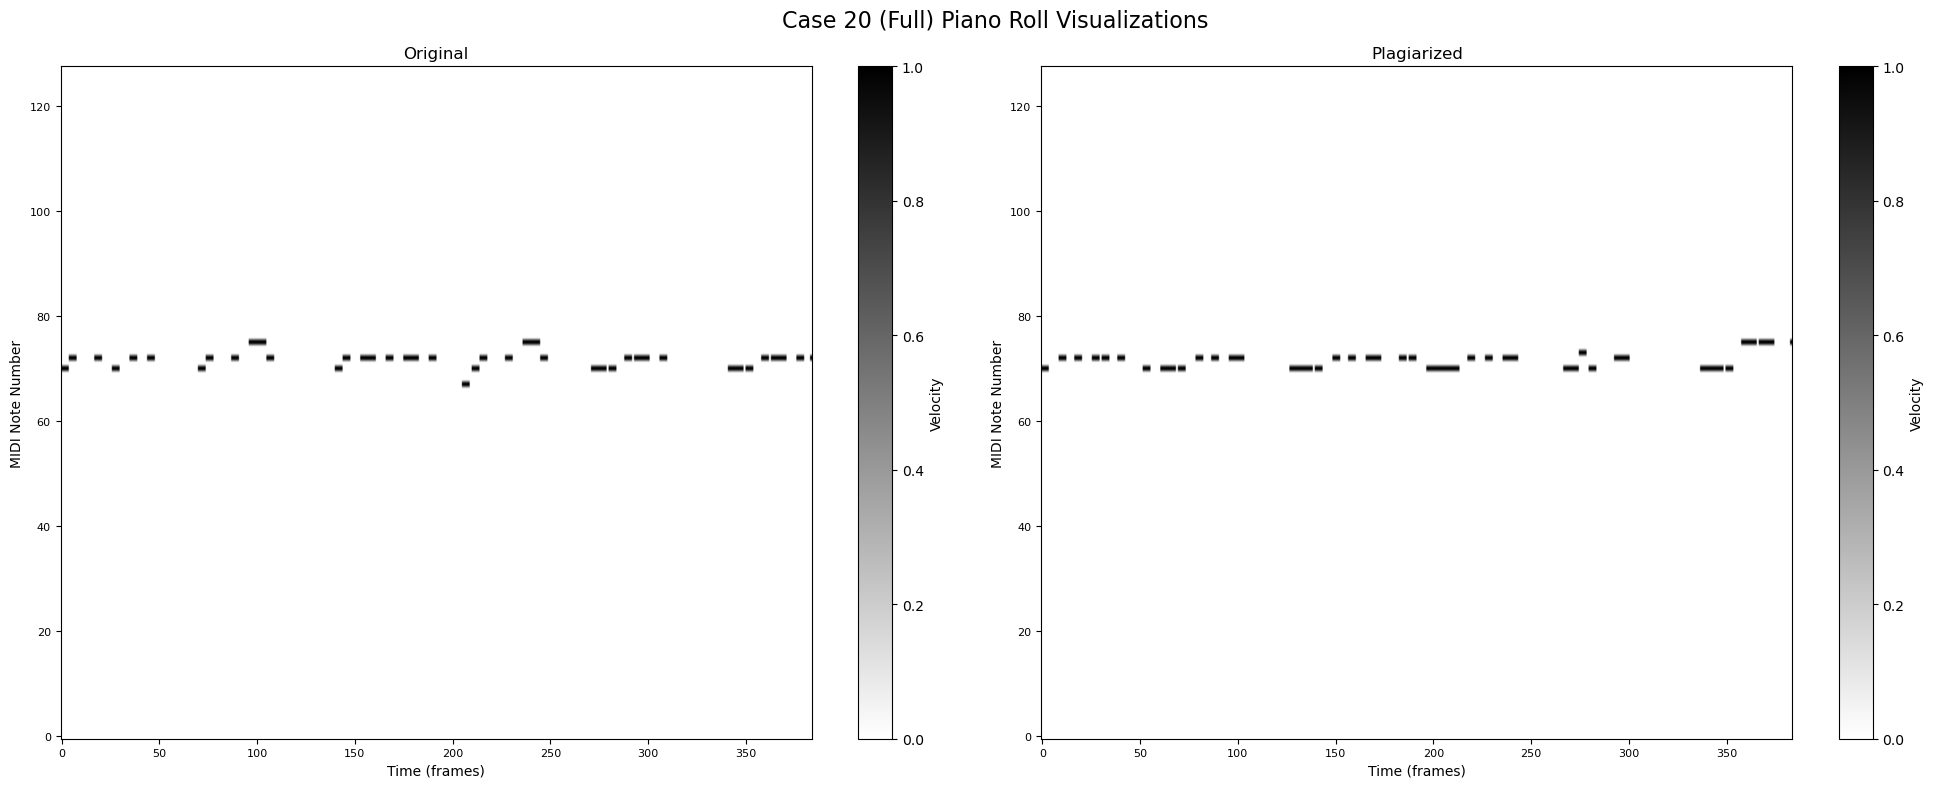

Processing case 21


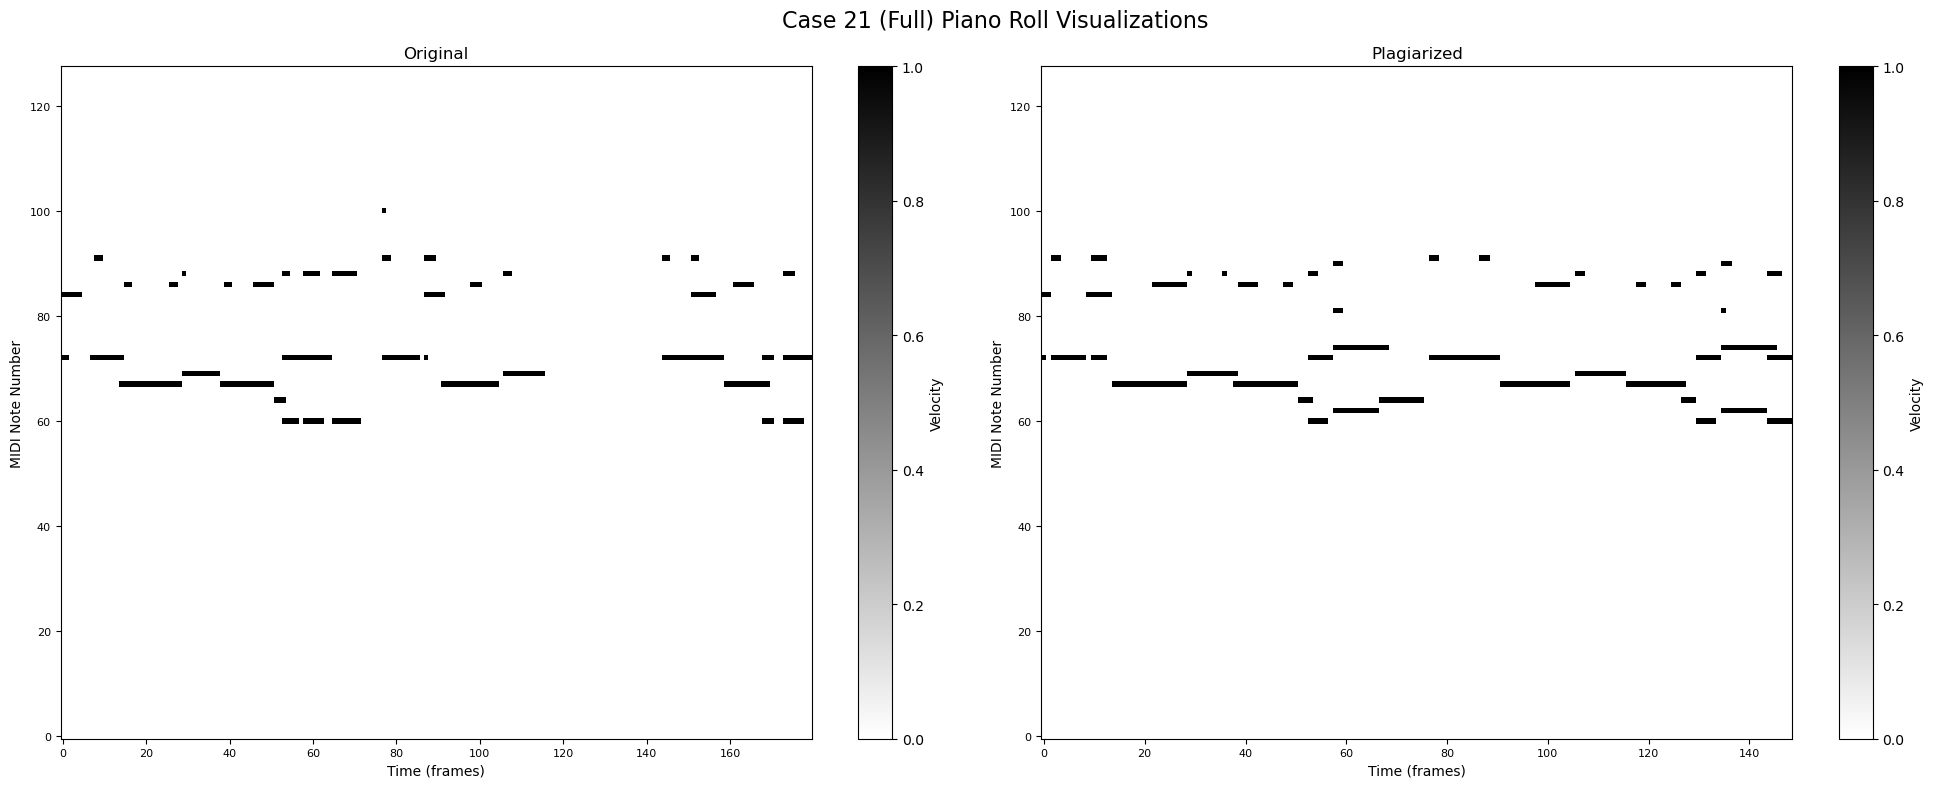

Processing case 22


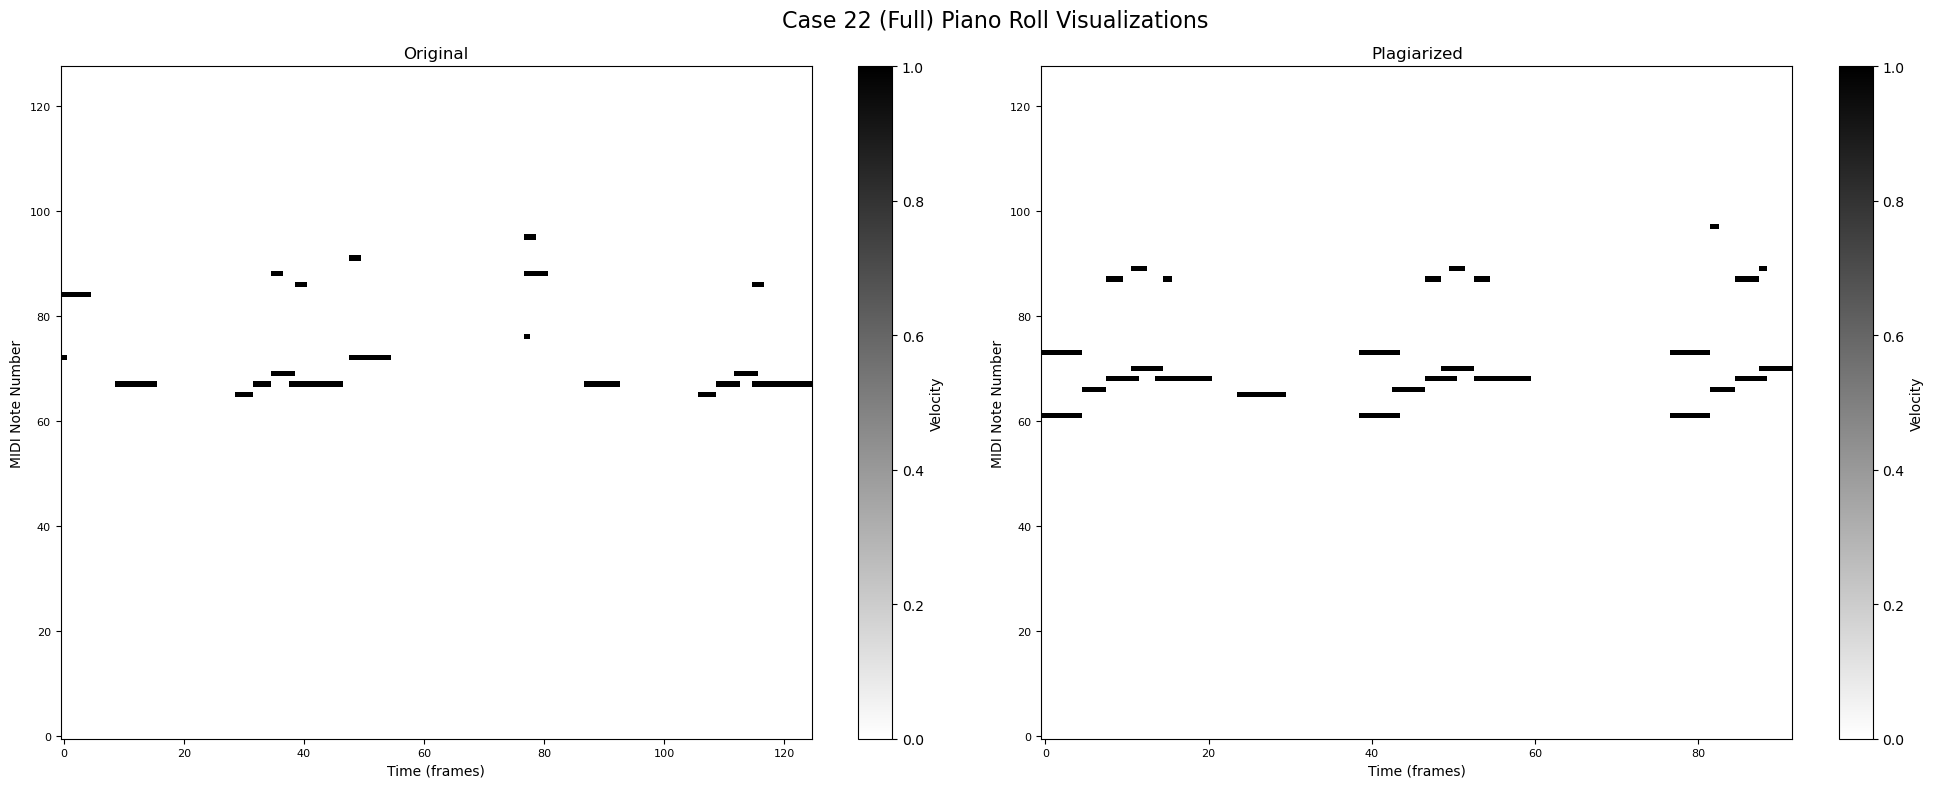

Processing case 23


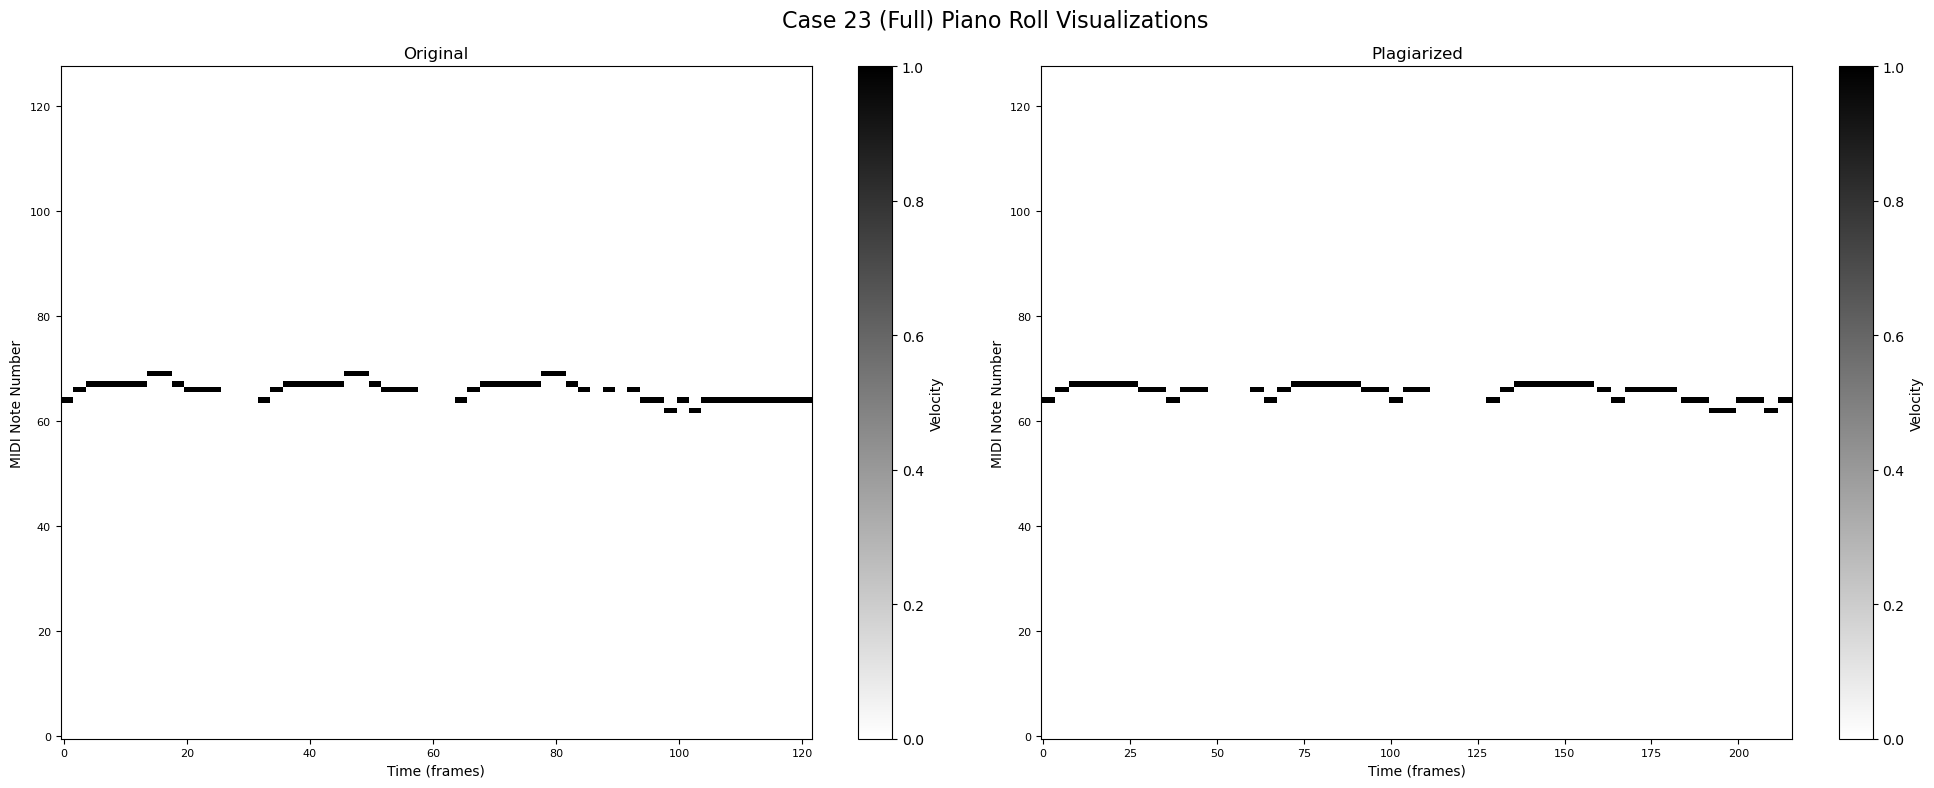

Processing case 24


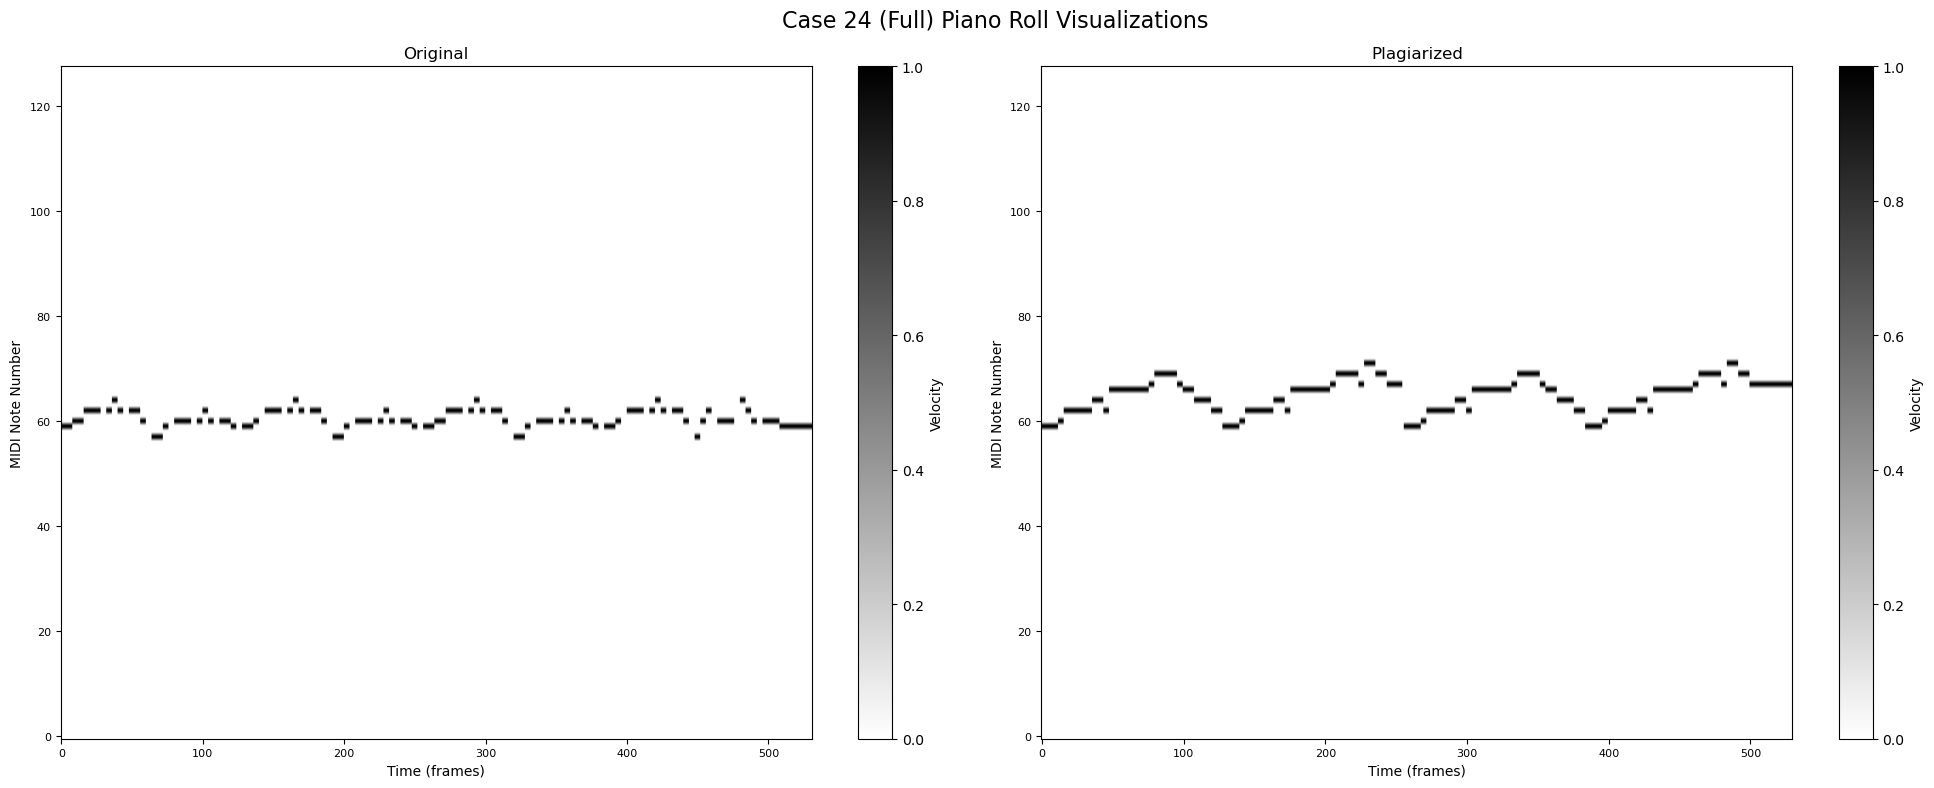

Processing case 25


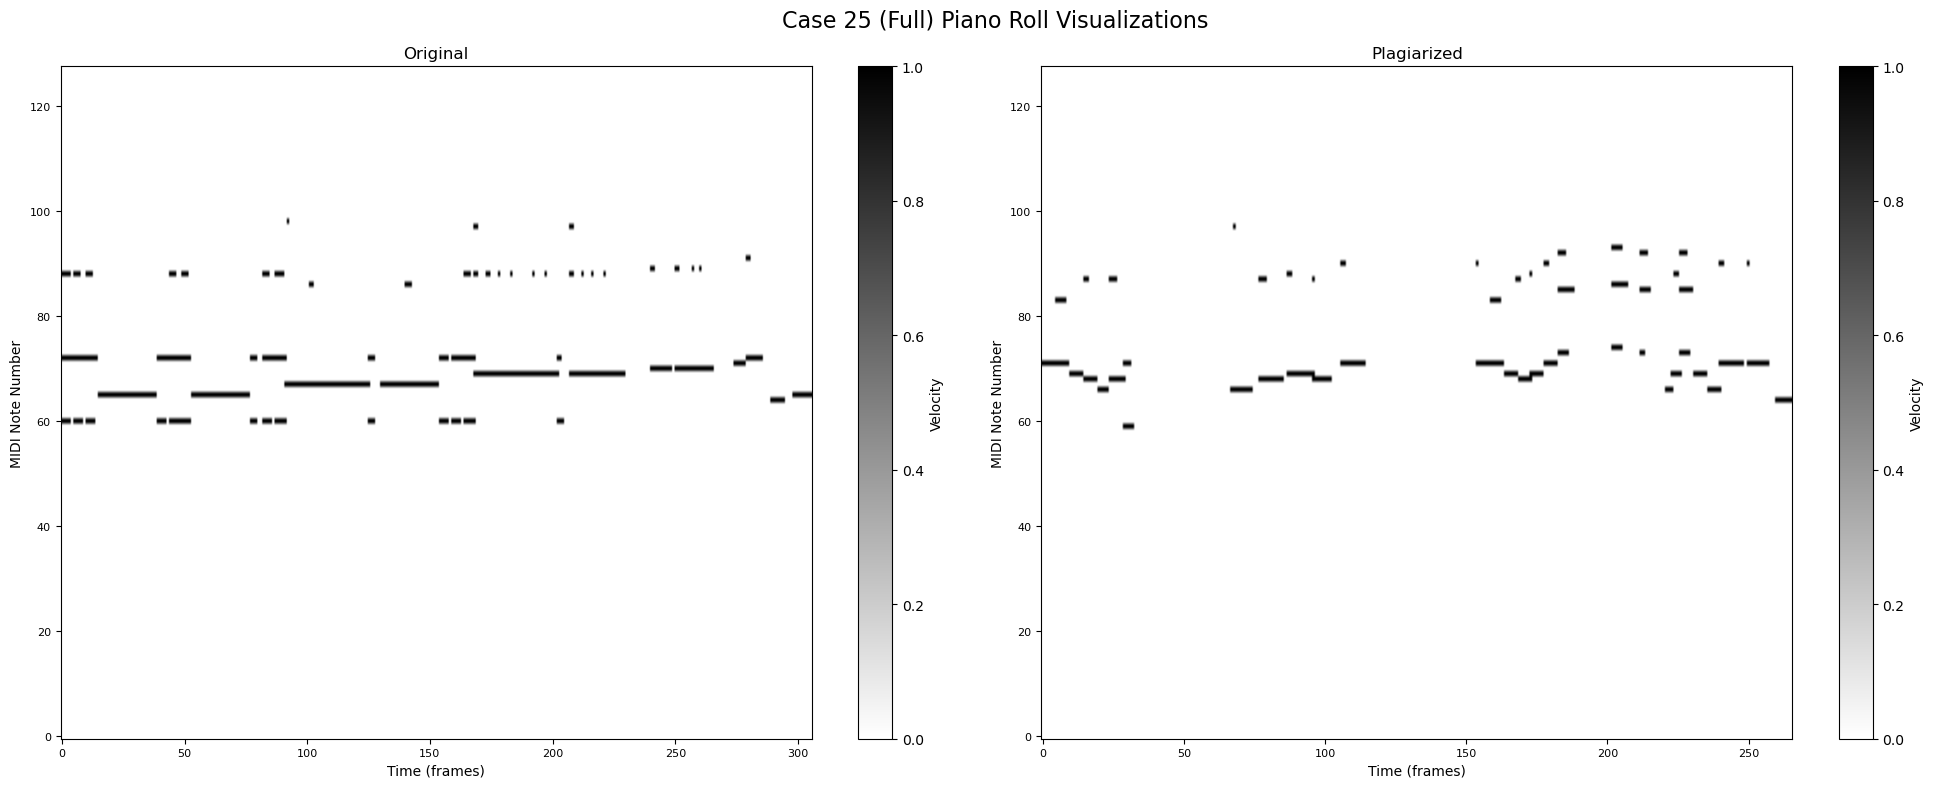

Processing case 26


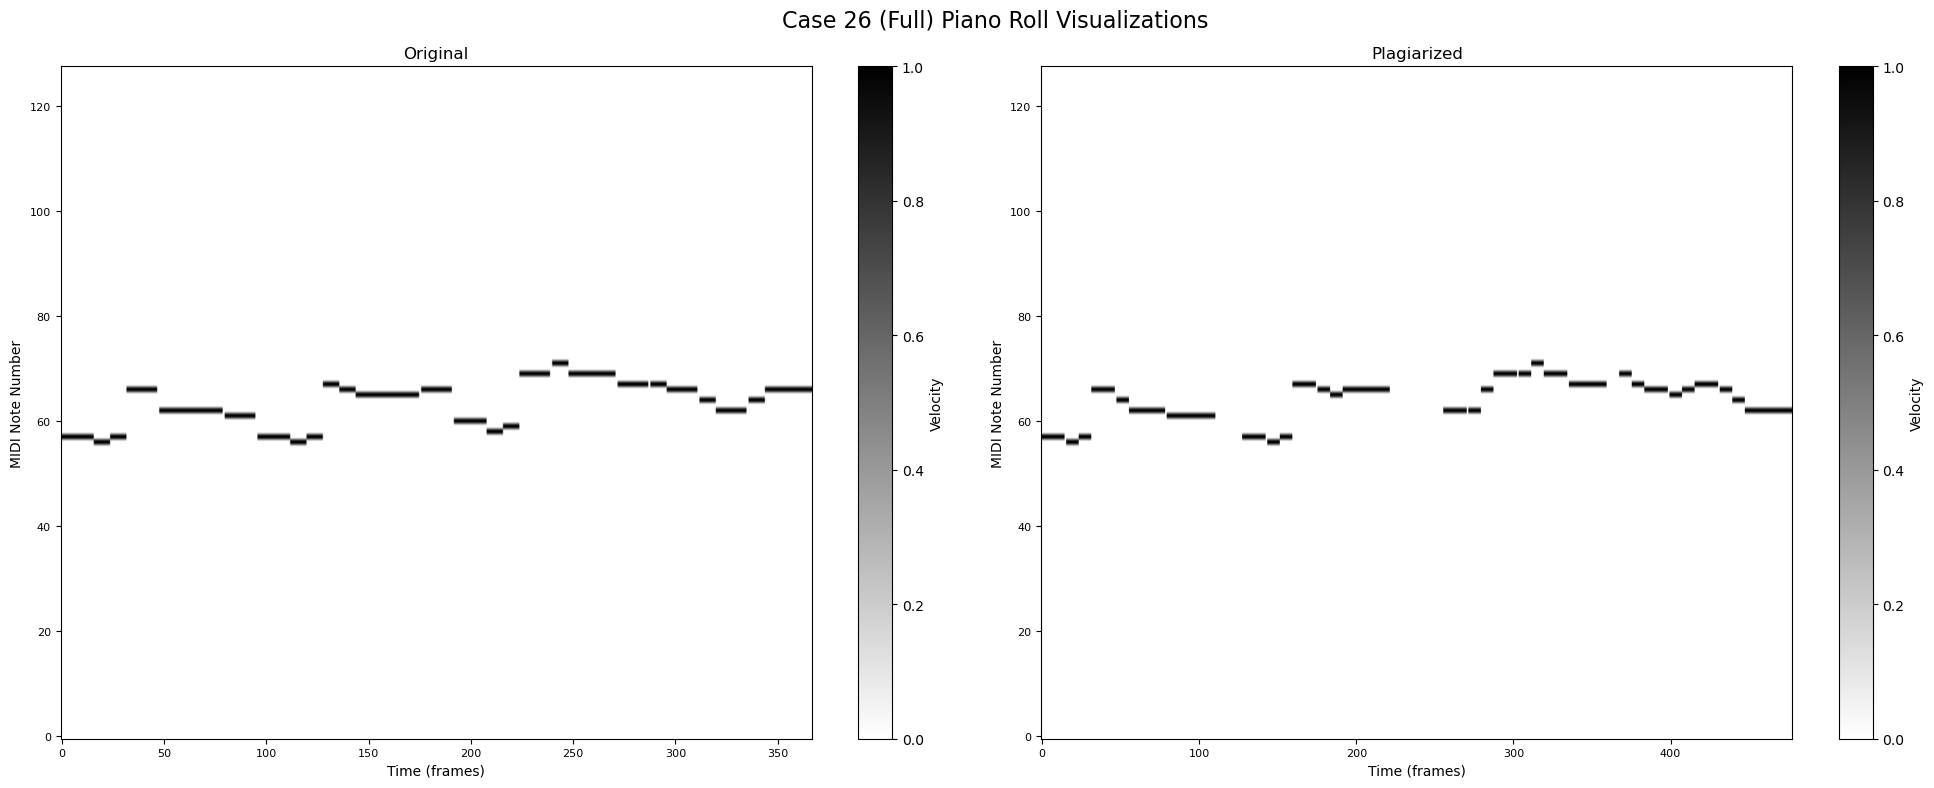

Processing case 27


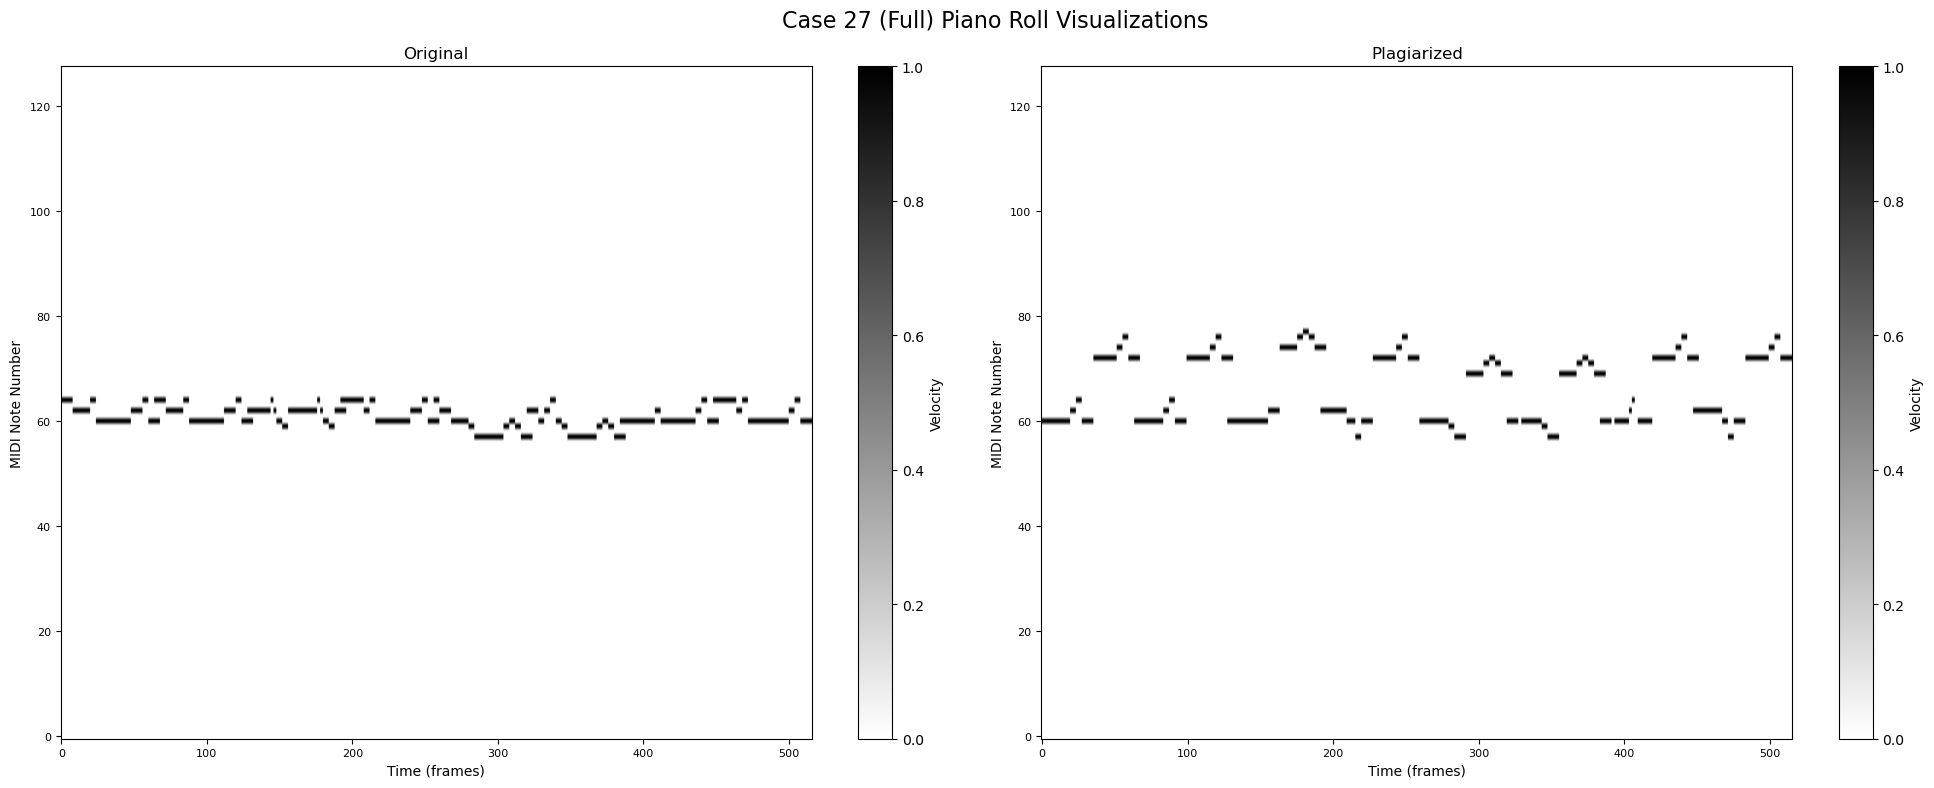

Processing case 28


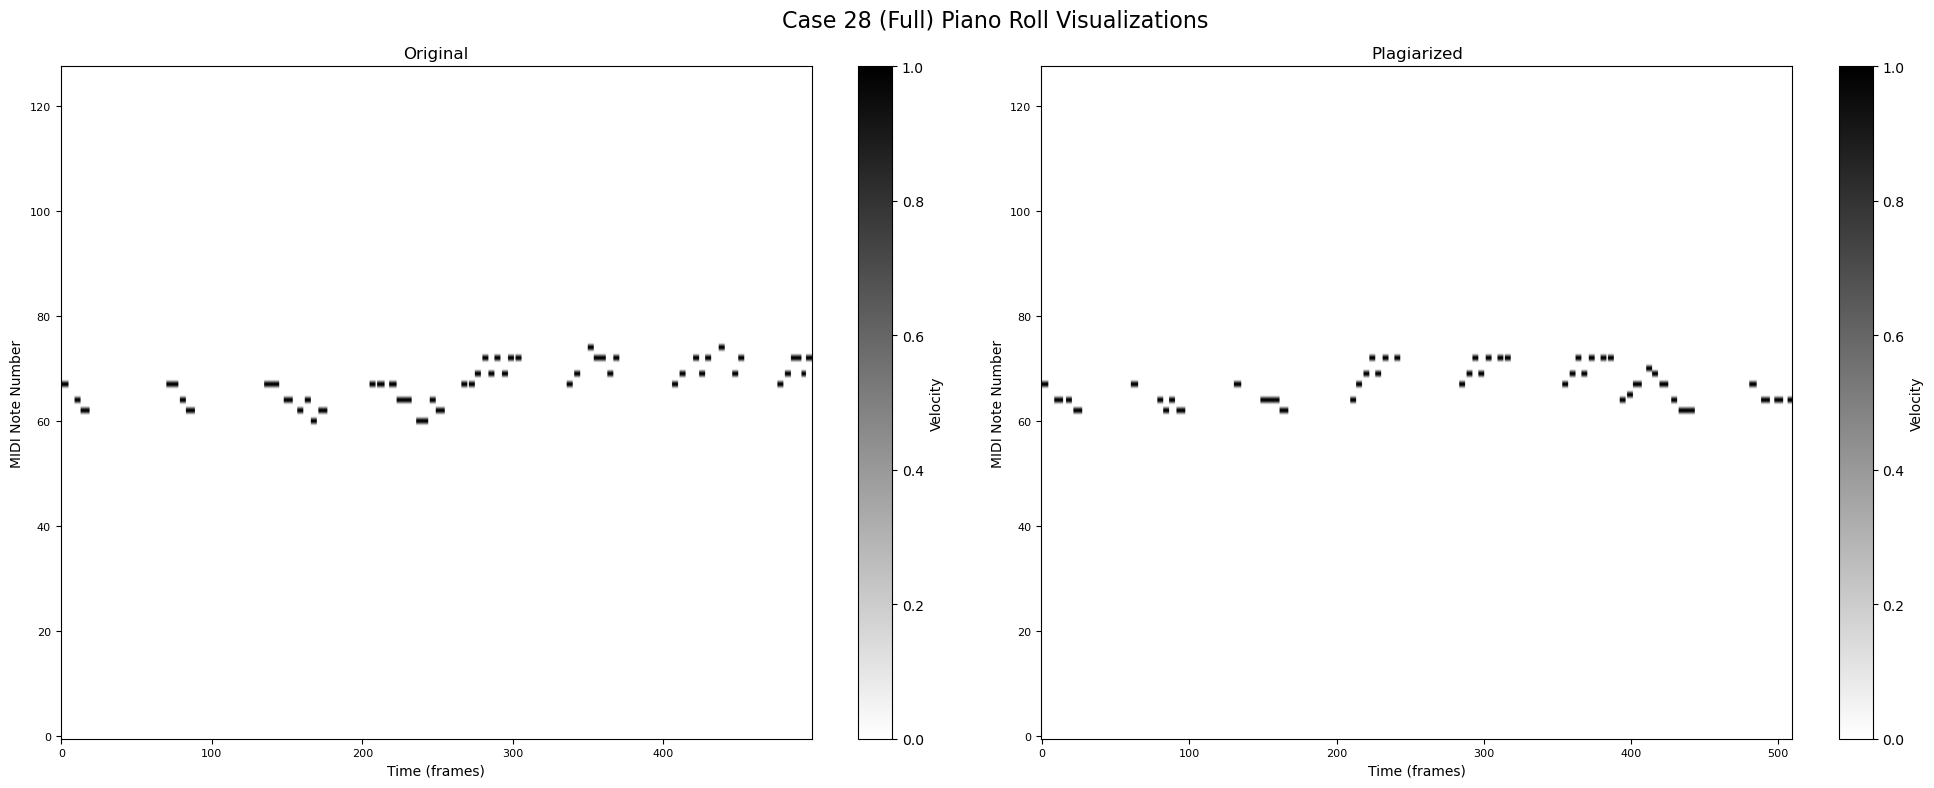

Processing case 29


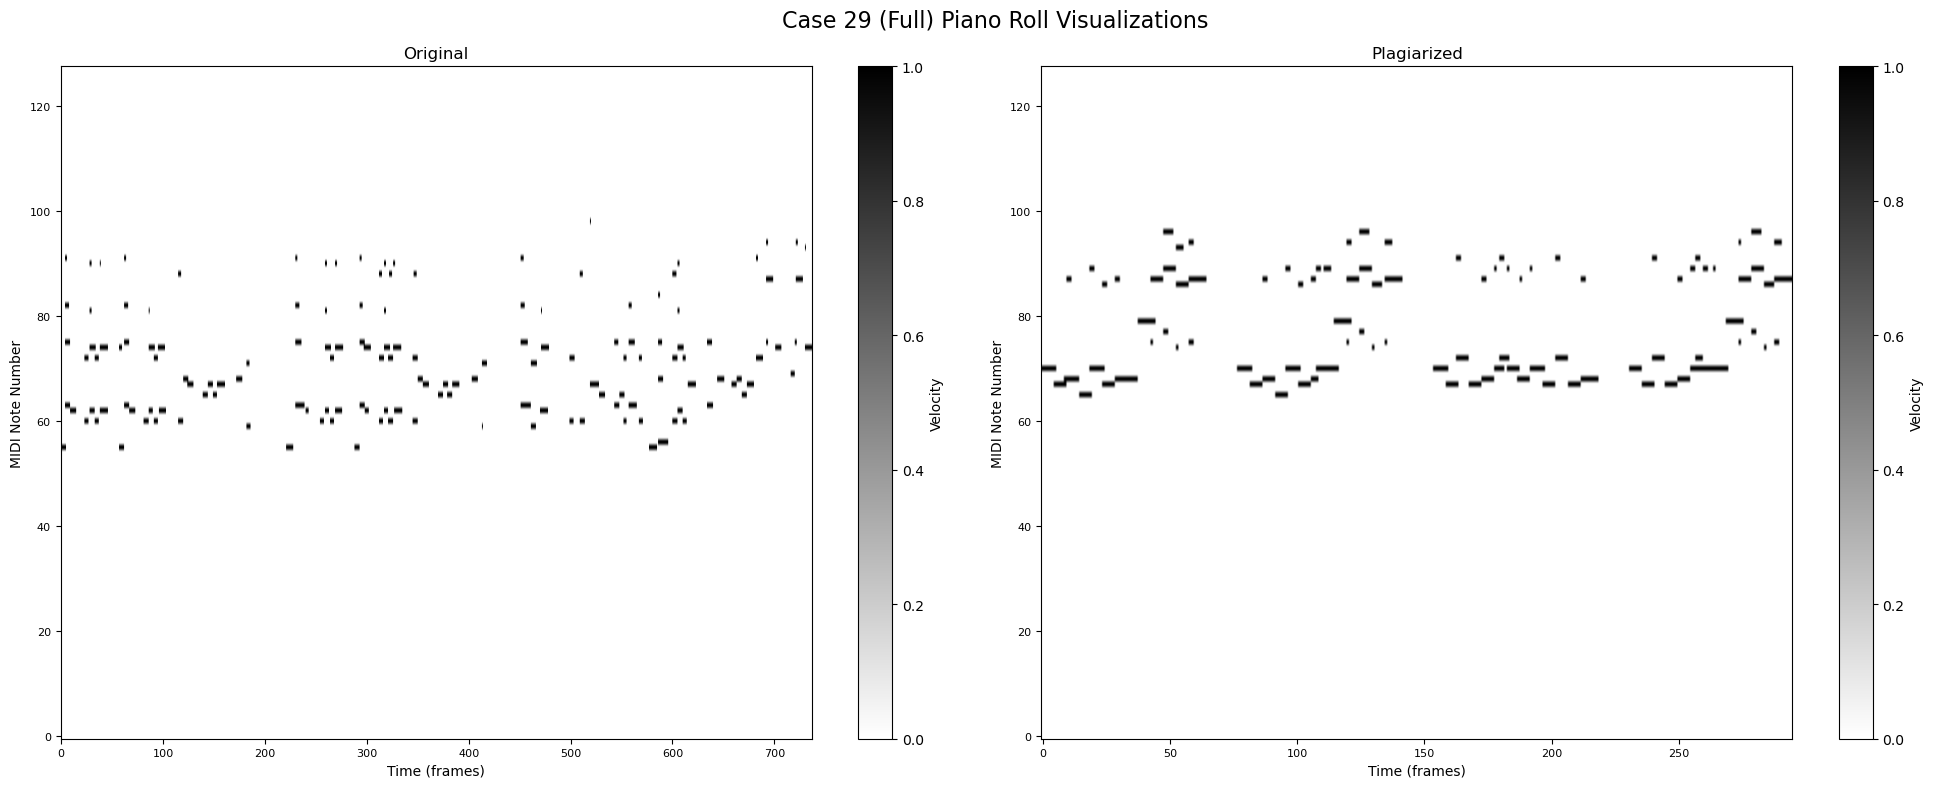

In [24]:
for i in range(29):
    print(f"Processing case {i+1}")
    for filename in os.listdir(ori_path):
        if filename.startswith(f"case{i+1}"):
            ori_midi_file = os.path.join(ori_path, filename)
            break
    for filename in os.listdir(plag_path):
        if filename.startswith(f"case{i+1}"):
            plag_midi_file = os.path.join(plag_path, filename)
            break

    ori_full_pr = midi_to_pr(ori_midi_file)
    plag_full_pr = midi_to_pr(plag_midi_file)
    
    if ori_full_pr is not None and plag_full_pr is not None:
        plot_piano_rolls(ori_full_pr, plag_full_pr, 'Original', 'Plagiarized', f"{i+1} (Full)")
    else:
        print(f"Skipping full plot for case {i+1} due to processing errors")



In [12]:
pr = pt.utils.compute_pianoroll(score)


In [14]:
pr.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

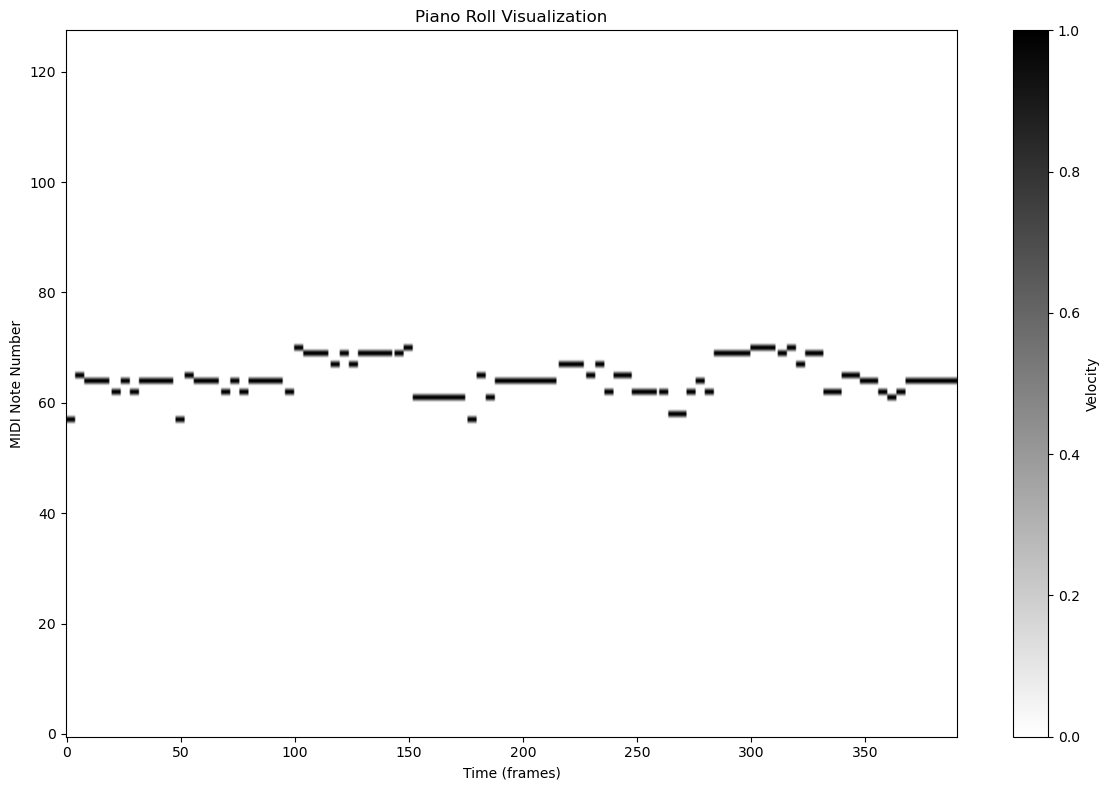

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'pr' is your piano roll object
piano_roll = pr.toarray()

# Create a new figure
plt.figure(figsize=(12, 8))

# Display the piano roll
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='binary')

# Customize the plot
plt.title('Piano Roll Visualization')
plt.xlabel('Time (frames)')
plt.ylabel('MIDI Note Number')

# Add colorbar
plt.colorbar(label='Velocity')

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
import torch

chunks = torch.load(r"data\exp3\all_chunks.pt")

C:\Users\cunn2\AppData\Local\Temp\ipykernel_298904\1794161776.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  chunks = torch.load(r"data\exp3\all_chunks.pt")
